# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set() 

In [2]:
data_2019 = pd.read_csv('Flujo Vehicular/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('Flujo Vehicular/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('Flujo Vehicular/flujo-vehicular-2017.csv',  sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769

In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [13]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00

[238869 rows x 5 columns]

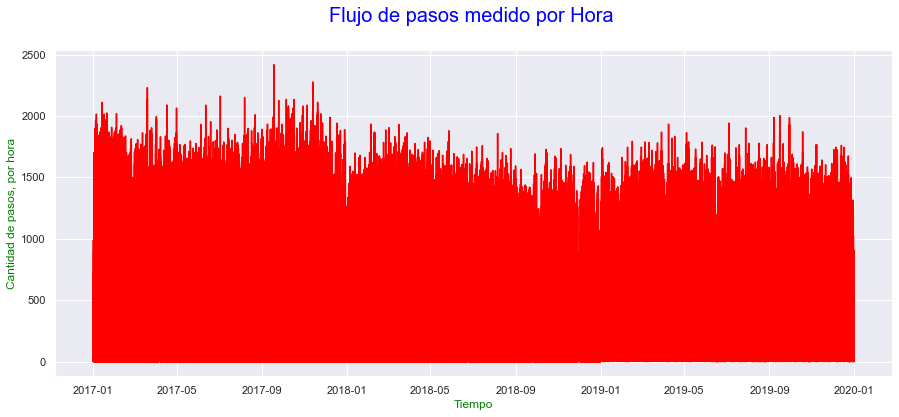

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos,color='red')
plt.title("Flujo de pasos medido por Hora \n", color= 'blue', fontsize= 20)
plt.xlabel('Tiempo', color='green')
plt.ylabel('Cantidad de pasos, por hora', color='green')
plt.show()

In [15]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

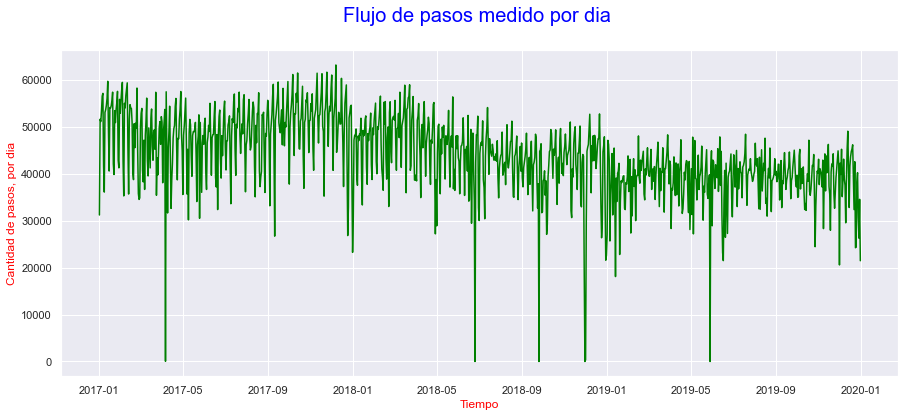

In [16]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos,color='green')
plt.title("Flujo de pasos medido por dia \n", color= 'blue', fontsize= 20)
plt.xlabel('Tiempo', color='red')
plt.ylabel('Cantidad de pasos, por dia',color='red' )
plt.show()

## Exploración de los Datos

### Inspeccionando si hay Valores faltantes

In [17]:
dataset.isnull (). sum ()

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
dtype: int64

In [18]:
dataset_ch=dataset.copy()
dataset_ch['date_check'] = dataset_ch.index.to_series().diff()
dataset_ch.date_check.value_counts()

1.0    238868
Name: date_check, dtype: int64

In [19]:
dataset_ch

dia    sentido tipo_vehiculo  cantidad_pasos               fecha  \
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00   
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00   
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00   
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00   
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00   
...         ...        ...           ...             ...                 ...   
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00   
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00   
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00   
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00   
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00   

        date_check  
0              NaN  
1              1.0  
2              1.0  
3              1.0  
4              1.0  
...            ...  
238864         1.0  
238865         1.0  
238866         1.0  
238867         1.0  
238868         1.0  

[238869 rows x 6 columns]

* Conclusion: no hay Valores Faltantes.

### Estudiando los valores Atipicos

In [20]:
diario_a=diario.copy()
diario_a.describe()

cantidad_pasos
count     1095.000000
mean     43712.859361
std       8192.736927
min          0.000000
25%      39061.500000
50%      43761.000000
75%      49498.000000
max      63127.000000

In [21]:
diario_a=diario[diario.cantidad_pasos <=10000]
diario_a

cantidad_pasos
fecha                     
2017-04-06              40
2018-06-25               0
2018-09-25               0
2018-11-30               0
2018-12-01             350
2019-05-29               0

* Conclusión: se observan la presencia de valores atipicos (en el gráfico lo visualizabamos como unos picos negativos)

 * Esos valores atípicos se deben a  fechas en las que no hubo pasos con pagos en efectivo, o que la cantidad de pasos con pago en efectivo estuvieron por debajo de 10000 por dia

In [22]:
diario.cantidad_pasos[diario.cantidad_pasos <=10000] = np.nan

* Se toma la decision de reemplazar eso valores atípicos mediante la interpolacion.
 * La interpolación es el proceso de encontrar un valor entre dos puntos en una línea o una curva. Para ayudarnos a recordar lo que significa, debemos pensar en la primera parte de la palabra, 'inter', como si significara 'ingresar', lo que nos recuerda que debemos mirar 'dentro' de los datos que teníamos originalmente. Esta herramienta, la interpolación, no solo es útil en estadísticas, sino que también es útil en ciencia, negocios o cuando existe la necesidad de predecir valores que se encuentran dentro de dos puntos de datos existentes.

In [23]:
print(diario.isna().sum())
diario = diario.interpolate(method='nearest', k=4)
print(diario.isna().sum())

cantidad_pasos    6
dtype: int64
cantidad_pasos    0
dtype: int64


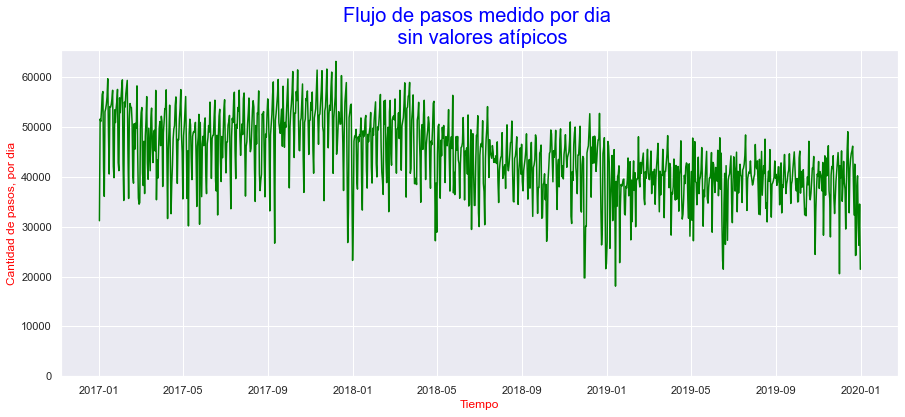

In [24]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos,color='green')
plt.title("Flujo de pasos medido por dia \n sin valores atípicos", color= 'blue', fontsize= 20)
plt.xlabel('Tiempo', color='red')
plt.ylabel('Cantidad de pasos, por dia',color='red' )
plt.ylim(ymin=0)
plt.show()

** Observamos en el grafico que desaparecen los picos negativos por debajo de 10000 pases diarios, al haber realizado la interpolación. Esto nos permite tener la informacion:
Con este dataset es con el que vamos a trabajar

##### Inspeccionando cuál fue la causa de la presencia de los valores atìpicos

* Dado que tenemos exactamente la fecha del valor atípico , quise inspeccionar a que se debió: si fue un error de sistema, levantamiento de barreras (ya sea programado por la misma empresa ó en forma de protesta), accidente, obra, etc.
* Para eso se realizó una exhaustiva búsqueda.

1- El  06/04/2017 se registraron 40 cantidad de pasos  con pago en efectivo

In [25]:
d_2017 =data_2017[(data_2017.estacion=='Illia')& (data_2017.fecha=='2017-04-06')]
d_2017=d_2017.loc[:, ['forma_pago' ,'cantidad_pasos']]
d_2017.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

cantidad_pasos
forma_pago                
NO COBRADO           45961
TELEPASE             19296
EFECTIVO                40
EXENTO                   1

* La disminución del cobro en efectivo durante el 06/04/2017, se debio al no cobro de peajes por el [paro nacional](http://localhost:8888/notebooks/Documents/Proyecto3Series-de-Tiempo/AnexoProyecto3.ipynb), desde las 6 hasta las 18 hs


2- El 25/06/2018 se registraron 0 cantidad de pasos con pago en efectivo

In [26]:
d_2018_25 =data_2018[(data_2018.estacion=='Illia')& (data_2018.fecha=='2018-06-25')]
d_2018_25=d_2018_25.loc[:, ['forma_pago' ,'cantidad_pasos']]
d_2018_25.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

cantidad_pasos
forma_pago                
NO COBRADO           85099

* La disminución del cobro en efectivo durante el 25/06/2018, se debió al no cobro de pajes por el [paro nacional](http://localhost:8888/notebooks/Documents/Proyecto3Series-de-Tiempo/AnexoProyecto3.ipynb)

3- El 25/09/2018 se registraron 0 cantidad de pasos con pago en efectivo

In [27]:
d_2018_25_9 =data_2018[(data_2018.estacion=='Illia')& (data_2018.fecha=='2018-09-25')]
d_2018_25_9=d_2018_25_9.loc[:, ['forma_pago' ,'cantidad_pasos']]
d_2018_25_9.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

cantidad_pasos
forma_pago                
NO COBRADO           78690

* La disminución del cobro en efectivo durante el 25/09/2018, se debió al no cobro de pajes por el [paro nacional](http://localhost:8888/notebooks/Documents/Proyecto3Series-de-Tiempo/AnexoProyecto3.ipynb)

4- El 30/11/2018 se registraron 0 cantidad de pasos con pago en efectivo


In [28]:
d_2018_30 =data_2018[(data_2018.estacion=='Illia')& (data_2018.fecha=='2018-11-30')]
d_2018_30=d_2018_30.loc[:, ['forma_pago' ,'cantidad_pasos']]
d_2018_30.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

cantidad_pasos
forma_pago                
NO COBRADO             387

5- El 01/12/2018 se registraron 350 cantidad de pasos con pago en efectivo

In [29]:
d_2018_1 =data_2018[(data_2018.estacion=='Illia')& (data_2018.fecha=='2018-12-01')]
d_2018_1=d_2018_1.loc[:, ['forma_pago' ,'cantidad_pasos']]
d_2018_1.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

cantidad_pasos
forma_pago                          
NO COBRADO                       464
EFECTIVO                         350
TELEPASE                         290
EXENTO                             9
INFRACCION                         5
TARJETA DISCAPACIDAD               3

* La disminución de los cobros, y en general de los pases con pago en efectivo durante  30/11/2018 y 01/12/2018, se debió a los cortes y operativos de seguridad por [G20](http://localhost:8888/notebooks/Documents/Proyecto3Series-de-Tiempo/AnexoProyecto3.ipynb)

6- El 29/05/2019se registraron 0 cantidad de pasos con pago en efectivo

In [30]:
d_2019_29 =data_2019[(data_2019.estacion=='Illia')& (data_2019.fecha=='2019-05-29')]
d_2019_29=d_2019_29.loc[:, ['forma_pago' ,'cantidad_pasos']]
d_2019_29.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

cantidad_pasos
forma_pago                
NO COBRADO           87419

* La disminucion del cobro en efectivo durante el 29/05/2019, se debó al no cobro de pajes por el [paro nacional](http://localhost:8888/notebooks/Documents/Proyecto3Series-de-Tiempo/AnexoProyecto3.ipynb)

**** Estudiando el comportamiento de la cantidad de pasos con forma de pago No cobrado**** 

In [31]:
#Unimos los 3 dataset_ncs, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_nc = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask_1 = np.logical_and(dataset_nc.estacion=='Illia', dataset_nc.forma_pago == 'NO COBRADO')
dataset_nc = dataset_nc[mask_1]

#Quitamos las columnas que no vamos a utilizar
dataset_nc.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset_nc.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
19  2019-01-01         1  Martes     Centro       Liviano             146
22  2019-01-01         1  Martes  Provincia       Liviano             147
24  2019-01-01         1  Martes  Provincia        Pesado               3
83  2019-01-01         2  Martes     Centro       Liviano               8
91  2019-01-01         2  Martes  Provincia       Liviano               4

In [32]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_nc['fecha2'] = pd.to_datetime(dataset_nc.fecha) + pd.to_timedelta(dataset_nc.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_nc.drop(columns=['fecha','hora_fin'], inplace = True)

dataset_nc.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
19  Martes     Centro       Liviano             146 2019-01-01 01:00:00
22  Martes  Provincia       Liviano             147 2019-01-01 01:00:00
24  Martes  Provincia        Pesado               3 2019-01-01 01:00:00
83  Martes     Centro       Liviano               8 2019-01-01 02:00:00
91  Martes  Provincia       Liviano               4 2019-01-01 02:00:00

In [33]:
#Corregimos el nombre de fecha2 a fecha
dataset_nc.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_nc.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
19  Martes     Centro       Liviano             146 2019-01-01 01:00:00
22  Martes  Provincia       Liviano             147 2019-01-01 01:00:00
24  Martes  Provincia        Pesado               3 2019-01-01 01:00:00
83  Martes     Centro       Liviano               8 2019-01-01 02:00:00
91  Martes  Provincia       Liviano               4 2019-01-01 02:00:00

In [34]:
#Reordenamos el dataset_nc por fecha
dataset_nc.sort_values('fecha', inplace = True)
dataset_nc.reset_index(drop=True, inplace = True)
dataset_nc

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0      Domingo  Provincia       Liviano               3 2017-01-01 00:00:00
1      Domingo     Centro       Liviano             183 2017-01-01 00:00:00
2      Domingo     Centro       Liviano             252 2017-01-01 01:00:00
3      Domingo  Provincia       Liviano             157 2017-01-01 01:00:00
4      Domingo  Provincia       Liviano              35 2017-01-01 02:00:00
...        ...        ...           ...             ...                 ...
66674   Martes  Provincia       Liviano              24 2019-12-31 21:00:00
66675   Martes     Centro       Liviano              11 2019-12-31 22:00:00
66676   Martes  Provincia       Liviano              27 2019-12-31 22:00:00
66677   Martes  Provincia       Liviano               7 2019-12-31 23:00:00
66678   Martes     Centro       Liviano               3 2019-12-31 23:00:00

[66679 rows x 5 columns]

In [35]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_nc = dataset_nc.resample('D', on = 'fecha').sum()
print(diario_nc.shape)
diario_nc.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01            1306
2017-01-02             627
2017-01-03             538
2017-01-04             618
2017-01-05             604

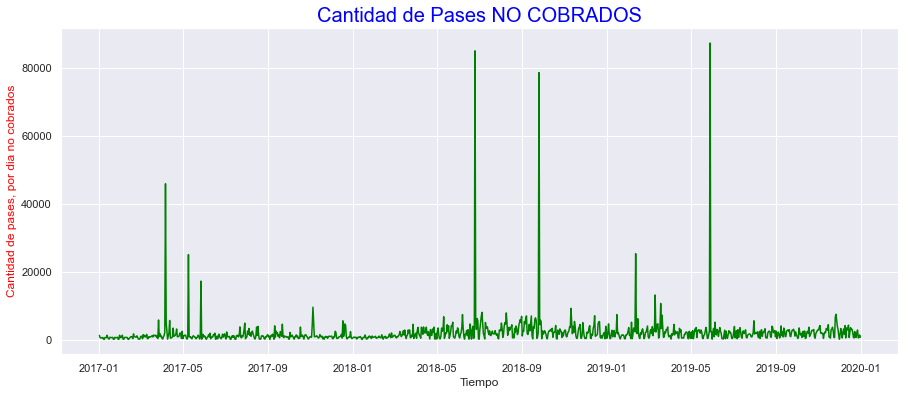

In [36]:
plt.figure(figsize = (15,6))
plt.plot(diario_nc.index, diario_nc.cantidad_pasos,color='green')
plt.title("Cantidad de Pases NO COBRADOS", color= 'blue', fontsize= 20)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pases, por dia no cobrados',color='red' )
plt.show()

##### Conclusión los dias que se producen los picos negativos de los cobros en Efectivo, se producen picos positivos de los No Cobrados

### Dias y horarios de Mayor Tráfico

#### 1- ¿Cuál fué el día de la semana con más pases?

In [37]:
masc_h= dataset[dataset.cantidad_pasos>=(dataset.cantidad_pasos.mean()+ dataset.cantidad_pasos.std())]
masc_h

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
11      Domingo     Centro       Liviano             857 2017-01-01 00:00:00
16      Domingo     Centro       Liviano             783 2017-01-01 02:00:00
19      Domingo  Provincia       Liviano             704 2017-01-01 03:00:00
22      Domingo     Centro       Liviano             988 2017-01-01 03:00:00
...         ...        ...           ...             ...                 ...
238850   Martes  Provincia       Liviano             643 2019-12-31 18:00:00
238854   Martes  Provincia       Liviano             640 2019-12-31 19:00:00
238858   Martes  Provincia       Liviano             773 2019-12-31 20:00:00
238861   Martes  Provincia       Liviano             905 2019-12-31 21:00:00
238862   Martes     Centro       Liviano             799 2019-12-31 21:00:00

[33559 rows x 5 columns]

In [38]:
masc_h.groupby('dia').sum().sort_values('cantidad_pasos', ascending=False)

cantidad_pasos
dia                      
Viernes           6260472
Jueves            5892907
Miércoles         5674526
Martes            5442516
Lunes             5225756
Sábado            5182949
Domingo           4299132

###### El día de la semana con mas pases fué el viernes 

#### 2- ¿Cuál fué la hora y de que fecha con más pases?

In [39]:
masc_h.groupby('fecha').sum().sort_values('cantidad_pasos', ascending=False)

cantidad_pasos
fecha                              
2017-10-05 18:00:00            3842
2017-10-13 15:00:00            3794
2017-11-17 14:00:00            3738
2017-12-07 16:00:00            3726
2017-10-13 16:00:00            3629
...                             ...
2019-10-24 23:00:00             604
2018-03-10 00:00:00             604
2018-02-12 09:00:00             604
2017-04-09 11:00:00             604
2017-03-04 00:00:00             604

[17658 rows x 1 columns]

###### La hora con mas pases fue a las 18 hs del 05/10/2017

#### 3- ¿Cuál fué el sentido con más pases?

In [40]:
masc_h.groupby('sentido').sum().sort_values('cantidad_pasos', ascending=False)

cantidad_pasos
sentido                  
Centro           19650277
Provincia        18327981

###### Segun la cantidad de pasos , los autos se dirigieron más en sentido al centro

#### 4- ¿Cuál fué la fecha con más pases?

In [41]:
masc_d= diario[diario.cantidad_pasos>=(diario.cantidad_pasos.mean()+ diario.cantidad_pasos.std())]
masc_d.sort_values('cantidad_pasos',ascending=False)

cantidad_pasos
fecha                     
2017-12-07         63127.0
2017-11-24         61594.0
2017-10-13         61421.0
2017-11-10         61382.0
2017-11-17         61259.0
...                    ...
2017-09-19         51556.0
2018-01-18         51548.0
2017-02-13         51546.0
2017-05-11         51543.0
2017-10-28         51497.0

[197 rows x 1 columns]

##### La fecha que mayor cantidad de pasos fue el 07/12/2017, de  los tres años

### Estudiando cada año

#### * Año 2017*

In [42]:
da_2017 =data_2017[data_2017.estacion=='Illia']
da_2017.describe(include='all')

periodo       fecha    hora_inicio       hora_fin      dia estacion  \
count   291900.0      291900  291900.000000  291900.000000   291900   291900   
unique       NaN         365            NaN            NaN        7        1   
top          NaN  2017-01-30            NaN            NaN  Viernes    Illia   
freq         NaN         906            NaN            NaN    43944   291900   
mean      2017.0         NaN      11.951011      12.080877      NaN      NaN   
std          0.0         NaN       6.535413       6.603749      NaN      NaN   
min       2017.0         NaN       0.000000       0.000000      NaN      NaN   
25%       2017.0         NaN       7.000000       7.000000      NaN      NaN   
50%       2017.0         NaN      12.000000      12.000000      NaN      NaN   
75%       2017.0         NaN      17.000000      18.000000      NaN      NaN   
max       2017.0         NaN      23.000000      23.000000      NaN      NaN   

       sentido tipo_vehiculo forma_pago  cantidad_pasos  
count   291900        291900     291900   291900.000000  
unique       2             2          7             NaN  
top     Centro        Pesado   EFECTIVO             NaN  
freq    160328        161166     104230             NaN  
mean       NaN           NaN        NaN      115.007139  
std        NaN           NaN        NaN      347.277410  
min        NaN           NaN        NaN        1.000000  
25%        NaN           NaN        NaN        2.000000  
50%        NaN           NaN        NaN        6.000000  
75%        NaN           NaN        NaN       23.000000  
max        NaN           NaN        NaN     3782.000000

In [43]:
da_2017['forma_pago'].value_counts()

EFECTIVO                104230
TELEPASE                 79903
EXENTO                   39201
INFRACCION               24526
TARJETA DISCAPACIDAD     22145
NO COBRADO               21881
MONEDERO                    14
Name: forma_pago, dtype: int64

In [44]:
data_2017['forma_pago'].value_counts()

EFECTIVO                447203
TELEPASE                397420
EXENTO                  169889
INFRACCION              140275
NO COBRADO              117730
TARJETA DISCAPACIDAD    100106
MONEDERO                    14
Otros                        8
Name: forma_pago, dtype: int64

* _*Año 2017*_
    
    * _*De todas las estaciones de peaje, la forma de pago elegida: efectivo*_
    
    * _*Estacion Illia en particular*_
        * Fecha con mas cantidad de pasos: 30/01/2017 
        * Día de la semana con mas cantidad de pasos : Viernes
        * Sentido con mas pasos : Centro
        * Tipo de vehiculo que mas paso  : Pesado 
        * Forma de pago con mas pasos: Efectivo

####  * Año 2018 *

In [45]:
da_2018 =data_2018[data_2018.estacion=='Illia']
da_2018.describe(include='all')

periodo       fecha    hora_inicio       hora_fin        dia  \
count   299519.0      299519  299519.000000  299519.000000     299519   
unique       NaN         365            NaN            NaN          7   
top          NaN  2018-10-05            NaN            NaN  Miércoles   
freq         NaN         960            NaN            NaN      45522   
mean      2018.0         NaN      11.932589      12.045807        NaN   
std          0.0         NaN       6.552504       6.618378        NaN   
min       2018.0         NaN       0.000000       0.000000        NaN   
25%       2018.0         NaN       7.000000       7.000000        NaN   
50%       2018.0         NaN      12.000000      12.000000        NaN   
75%       2018.0         NaN      17.000000      18.000000        NaN   
max       2018.0         NaN      23.000000      23.000000        NaN   

       estacion sentido tipo_vehiculo forma_pago  cantidad_pasos  
count    299519  299519        299519     299519   299519.000000  
unique        1       2             2          6             NaN  
top       Illia  Centro        Pesado   EFECTIVO             NaN  
freq     299519  154648        163619      99996             NaN  
mean        NaN     NaN           NaN        NaN      115.151419  
std         NaN     NaN           NaN        NaN      354.717350  
min         NaN     NaN           NaN        NaN        1.000000  
25%         NaN     NaN           NaN        NaN        2.000000  
50%         NaN     NaN           NaN        NaN        5.000000  
75%         NaN     NaN           NaN        NaN       20.000000  
max         NaN     NaN           NaN        NaN     5224.000000

In [46]:
da_2018['forma_pago'].value_counts()

EFECTIVO                99996
TELEPASE                89921
EXENTO                  37498
INFRACCION              29459
NO COBRADO              23454
TARJETA DISCAPACIDAD    19191
Name: forma_pago, dtype: int64

In [47]:
data_2018['forma_pago'].value_counts()

TELEPASE                429053
EFECTIVO                423633
EXENTO                  162103
INFRACCION              153331
NO COBRADO              121440
TARJETA DISCAPACIDAD     86348
Name: forma_pago, dtype: int64

* _*Año 2018*_
    
    * _*De todas las estaciones de peaje, la forma de pago elegida: telepase*_
    
    * _*Estacion Illia en particular*_
        * Fecha con mas cantidad de pasos: 05/10/2018 
        * Día de la semana con mas cantidad de pasos : Miércoles
        * Sentido con mas pasos : Centro
        * Tipo de vehiculo que mas paso  : Pesado
        * Forma de pago con mas pasos: Efectivo

#### * Año 2019 *

In [48]:
#Sobre la estacion Illia
da_2019 =data_2019[data_2019.estacion=='Illia']
da_2019.describe(include='all')

periodo       fecha    hora_inicio       hora_fin     dia estacion  \
count   161133.0      161133  161133.000000  161133.000000  161133   161133   
unique       NaN         365            NaN            NaN       7        1   
top          NaN  2019-03-15            NaN            NaN  Martes    Illia   
freq         NaN         480            NaN            NaN   23602   161133   
mean      2019.0         NaN      11.770004      11.827180     NaN      NaN   
std          0.0         NaN       6.718099       6.759874     NaN      NaN   
min       2019.0         NaN       0.000000       0.000000     NaN      NaN   
25%       2019.0         NaN       6.000000       6.000000     NaN      NaN   
50%       2019.0         NaN      12.000000      12.000000     NaN      NaN   
75%       2019.0         NaN      17.000000      18.000000     NaN      NaN   
max       2019.0         NaN      23.000000      23.000000     NaN      NaN   

          sentido tipo_vehiculo forma_pago  cantidad_pasos  
count      161133        161133     161133   161133.000000  
unique          2             2          6             NaN  
top     Provincia       Liviano   TELEPASE             NaN  
freq        81283        100861      34788             NaN  
mean          NaN           NaN        NaN      211.968790  
std           NaN           NaN        NaN      488.961921  
min           NaN           NaN        NaN        1.000000  
25%           NaN           NaN        NaN        4.000000  
50%           NaN           NaN        NaN       12.000000  
75%           NaN           NaN        NaN       68.000000  
max           NaN           NaN        NaN     5330.000000

In [49]:
#Sobre la estacion Illia
da_2019['forma_pago'].value_counts()

TELEPASE           34788
EFECTIVO           34643
EXENTO             29204
INFRACCION         24015
NO COBRADO         21344
T. DISCAPACIDAD    17139
Name: forma_pago, dtype: int64

In [50]:
# de todas las estaciones
data_2019['forma_pago'].value_counts()

TELEPASE           201388
EFECTIVO           149340
NO COBRADO         141280
EXENTO             132716
INFRACCION         111428
T. DISCAPACIDAD     76001
Name: forma_pago, dtype: int64

* _*Año 2019*_ 
    
    * _*De todas las estaciones de peaje, la forma de pago elegida: telepase*_
    
    * _*Estación Illia en particular*_
        * Fecha con mas cantidad de pasos: 15/03/2019 
        * Día de la semana con mas cantidad de pasos : Martes 
        * Sentido con mas pasos : Provincia
        * Tipo de vehiculo que mas paso  : liviano 
        * Forma de pago con mas pasos: Telepase

### Analizando  las formas de pago: Efectivo y Telepase

#### 1-En la  Autopista Illia

* Creando el dataset de telepases

In [51]:
#Unimos los 3 dataset_t, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_t = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask_t_i = np.logical_and(dataset_t.estacion=='Illia', dataset_t.forma_pago == 'TELEPASE')
dataset_t = dataset_t[mask_t_i]
#Quitamos las columnas que no vamos a utilizar
dataset_t.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_t['fecha2'] = pd.to_datetime(dataset_t.fecha) + pd.to_timedelta(dataset_t.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_t.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
dataset_t.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset_t por fecha
dataset_t.sort_values('fecha', inplace = True)
dataset_t.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_t = dataset_t.resample('D', on = 'fecha').sum()



In [52]:
print("Año-2017")
print("Porcentaje de pago en Efectivo  sobre el total de pagos: ", "{0:.0%}".format
      (da_2017[da_2017.forma_pago=='EFECTIVO'].shape[0]/da_2017["forma_pago"].shape[0]))
print("Porcentaje de pago Con Telepase sobre el total de pagos: ", "{0:.0%}".format
      (da_2017[da_2017.forma_pago=='TELEPASE'].shape[0]/da_2017["forma_pago"].shape[0]))

Año-2017
Porcentaje de pago en Efectivo  sobre el total de pagos:  36%
Porcentaje de pago Con Telepase sobre el total de pagos:  27%


In [53]:
print("Año-2018")
print("Porcentaje de pago en Efectivo  sobre el total de pagos: ", "{0:.0%}".format
      (da_2018[da_2018.forma_pago=='EFECTIVO'].shape[0]/da_2018["forma_pago"].shape[0]))
print("Porcentaje de pago Con Telepase sobre el total de pagos: ", "{0:.0%}".format
      (da_2018[da_2018.forma_pago=='TELEPASE'].shape[0]/da_2018["forma_pago"].shape[0]))

Año-2018
Porcentaje de pago en Efectivo  sobre el total de pagos:  33%
Porcentaje de pago Con Telepase sobre el total de pagos:  30%


In [54]:
print("Año-2019")
print("Porcentaje de pago en Efectivo  sobre el total de pagos: ", "{0:.0%}".format
      (da_2019[da_2019.forma_pago=='EFECTIVO'].shape[0]/da_2019["forma_pago"].shape[0]))
print("Porcentaje de pago Con Telepase sobre el total de pagos: ", "{0:.0%}".format
      (da_2019[da_2019.forma_pago=='TELEPASE'].shape[0]/da_2019["forma_pago"].shape[0]))

Año-2019
Porcentaje de pago en Efectivo  sobre el total de pagos:  21%
Porcentaje de pago Con Telepase sobre el total de pagos:  22%


######  Con estos porcentajes podemos concluir que en la autopista Illia hay una migracion de la forma de pago de desde Efectivo a Telepase. Esto se debio fundamentalmente a la Inauguracion del [Paseo del Bajo](http://localhost:8888/notebooks/Documents/Proyecto3Series-de-Tiempo/AnexoProyecto3.ipynb) y a  las polïticas de CABA implementadas  de [Tarifas planas](http://localhost:8888/notebooks/Documents/Proyecto3Series-de-Tiempo/AnexoProyecto3.ipynb), para incentivar el pago con telepase

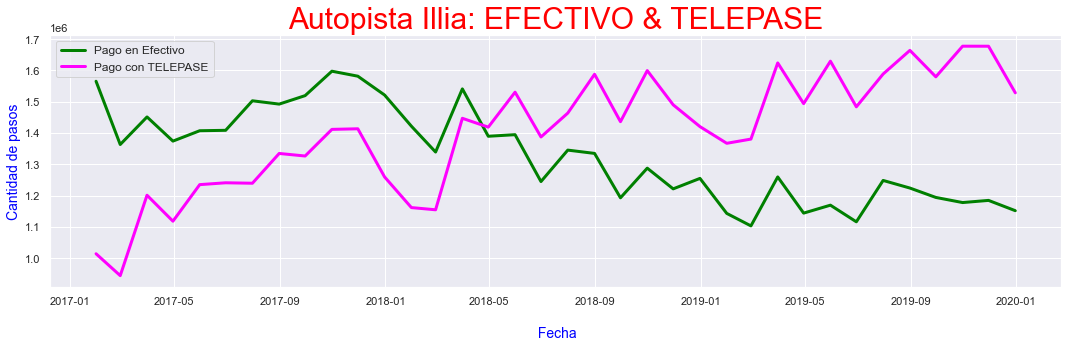

In [55]:
# A los fines de poder visualizar la tendencia se hizo un resampleo a la forma mensual
mensual_t =dataset_t.resample('M', on = 'fecha').sum()
mensual =dataset.resample('M', on = 'fecha').sum()

plt.figure(figsize=(15,5))
plt.plot(mensual.index, mensual.cantidad_pasos,lw=3,color='green', label='Pago en Efectivo')
plt.plot(mensual_t.index, mensual_t.cantidad_pasos, lw=3, color='magenta',label='Pago con TELEPASE')
plt.title ('Autopista Illia: EFECTIVO & TELEPASE', color='red', fontsize=30)
plt.xlabel('\n Fecha', color='blue',fontsize=14)
plt.ylabel('Cantidad de pasos', color='blue',fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

###### Claramente observamos que la cantidad de pasos con pago en efectivo fue decreciendo en el Intervalo de los 3 años , o sea hubo una migracion a la forma de pago Telepase. Esto tambien tiene relacion con los descuentos que se ofrecía si los usuarios elegian esta forma de pago. A partir del 28/09/2020 ya es obligatorio el uso de [Telepase](http://localhost:8888/notebooks/Documents/Proyecto3Series-de-Tiempo/AnexoProyecto3.ipynb), siendo el descuento a la fecha de un 30%

#### 2-Comparamos Estacion Illia con Avellaneda: las dos formas de pago

In [56]:
#Unimos los 3 dataset_a, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_a = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask_a = np.logical_and(dataset_a.estacion=='Avellaneda', dataset_a.forma_pago == 'EFECTIVO')
dataset_a = dataset_a[mask_a]
#Quitamos las columnas que no vamos a utilizar
dataset_a.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_a['fecha2'] = pd.to_datetime(dataset_a.fecha) + pd.to_timedelta(dataset_a.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_a.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
dataset_a.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset_a por fecha
dataset_a.sort_values('fecha', inplace = True)
dataset_a.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_a = dataset_a.resample('D', on = 'fecha').sum()
diario_a.head()

cantidad_pasos
fecha                     
2017-01-01           72504
2017-01-02           87547
2017-01-03           86139
2017-01-04           88180
2017-01-05           90281

In [57]:
#Unimos los 3 dataset_a_t, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_a_t = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask_a_t = np.logical_and(dataset_a_t.estacion=='Avellaneda', dataset_a_t.forma_pago == 'TELEPASE')
dataset_a_t = dataset_a_t[mask_a_t]
#Quitamos las columnas que no vamos a utilizar
dataset_a_t.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_a_t['fecha2'] = pd.to_datetime(dataset_a_t.fecha) + pd.to_timedelta(dataset_a_t.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_a_t.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
dataset_a_t.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset_a_t por fecha
dataset_a_t.sort_values('fecha', inplace = True)
dataset_a_t.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_a_t = dataset_a_t.resample('D', on = 'fecha').sum()
diario_a_t.head()

cantidad_pasos
fecha                     
2017-01-01           22024
2017-01-02           43988
2017-01-03           46780
2017-01-04           46623
2017-01-05           48311

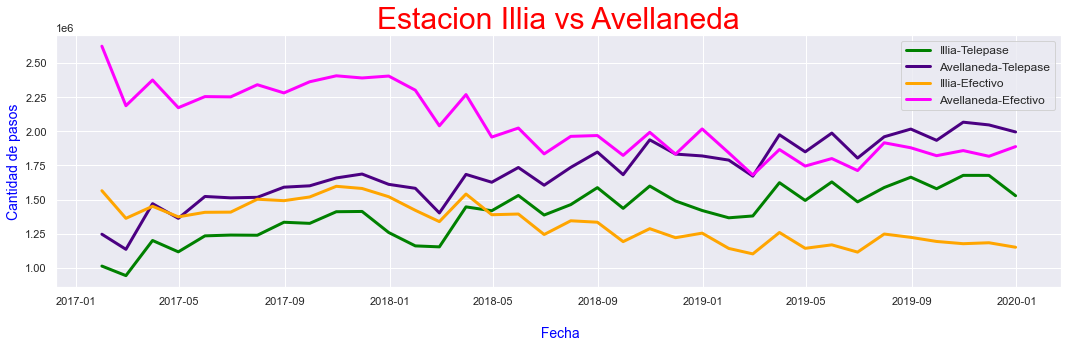

In [58]:
# A los fines de poder visualizar la tendencia se hizo un resampleo a la forma mensual
mensual_t =dataset_t.resample('M', on = 'fecha').sum()
mensual_a =dataset_a.resample('M', on = 'fecha').sum()
mensual_a_t =dataset_a_t.resample('M', on = 'fecha').sum()
mensual =dataset.resample('M', on = 'fecha').sum()

plt.figure(figsize=(15,5))
plt.plot(mensual_t.index, mensual_t.cantidad_pasos,lw=3,color='green', label='Illia-Telepase')
plt.plot(mensual_a_t.index, mensual_a_t.cantidad_pasos, lw=3, color='indigo',label='Avellaneda-Telepase')
plt.plot(mensual.index, mensual.cantidad_pasos,lw=3,color='orange', label='Illia-Efectivo')
plt.plot(mensual_a.index, mensual_a.cantidad_pasos, lw=3, color='magenta',label='Avellaneda-Efectivo')


plt.title ('Estacion Illia vs Avellaneda', color='red', fontsize=30)
plt.xlabel('\n Fecha', color='blue',fontsize=14)
plt.ylabel('Cantidad de pasos', color='blue',fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

###### Claramente observamos que en las ods estaciones de Peaje,  la cantidad de pasos con pago en efectivo fue decreciendo en el Intervalo de los 3 años , o sea hubo una migracion a la forma de pago Telepase. 

### Resampleos

##### Probaremos diferentes formas de resampleos, para luego decidir con cual de todos trabajar. 

*A- Resampleamos con la suma

1. Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable, con el data diarios donde ya realizamos la interpolacion de los datos atipicos

In [59]:

semanal =diario.resample('W').sum()
print(semanal.shape)
semanal

(158, 1)


cantidad_pasos
fecha                     
2017-01-01         31183.0
2017-01-08        347212.0
2017-01-15        366413.0
2017-01-22        357215.0
2017-01-29        354581.0
...                    ...
2019-12-08        282891.0
2019-12-15        272960.0
2019-12-22        292881.0
2019-12-29        226390.0
2020-01-05         55970.0

[158 rows x 1 columns]

2.Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable, con el dataset original

In [60]:
semanal_1 =dataset.resample('W', on = 'fecha').sum()
print(semanal_1.shape)
semanal_1

(158, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-08          347212
2017-01-15          366413
2017-01-22          357215
2017-01-29          354581
...                    ...
2019-12-08          282891
2019-12-15          272960
2019-12-22          292881
2019-12-29          226390
2020-01-05           55970

[158 rows x 1 columns]

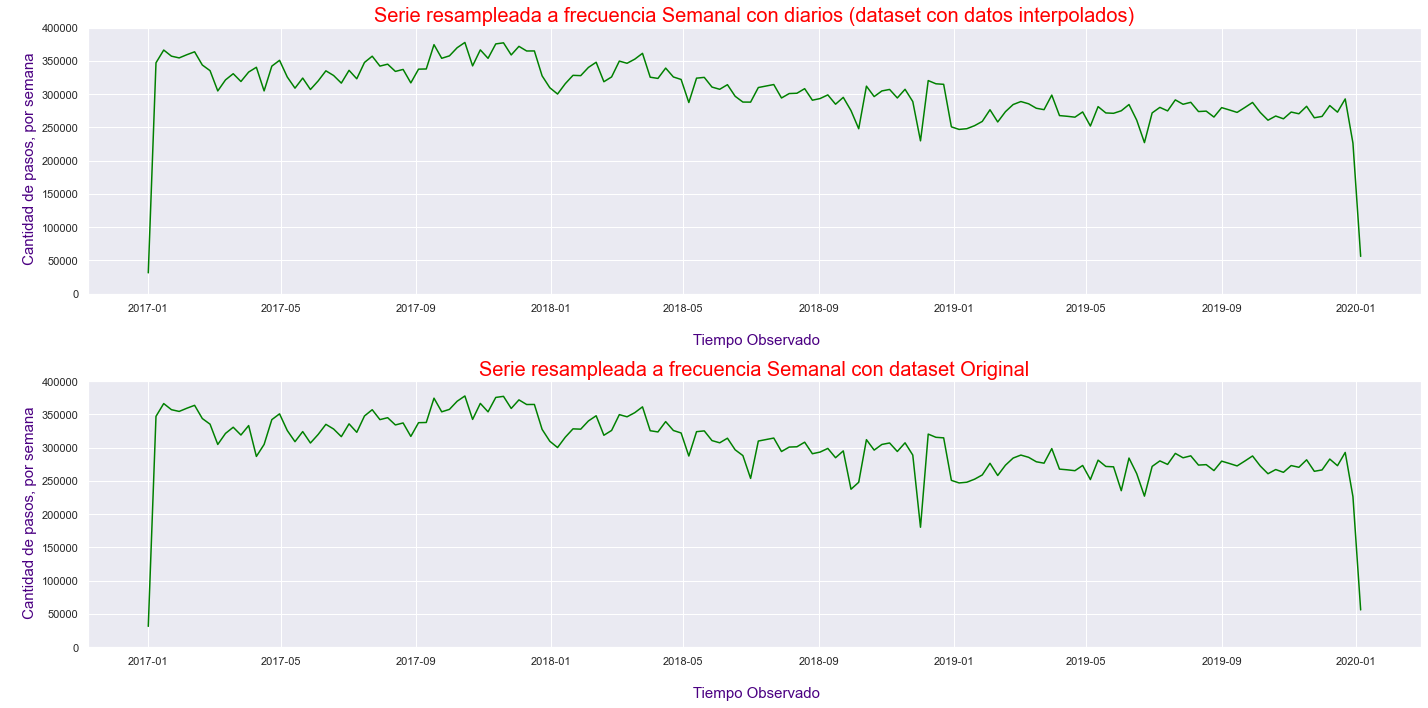

In [61]:
plt.figure(figsize = (20,10))
Gs= gridspec.GridSpec(2,1)
ax0= plt.subplot(Gs[0])
plt.plot(semanal.index, semanal.cantidad_pasos,color='green')
plt.title("Serie resampleada a frecuencia Semanal con diarios (dataset con datos interpolados)", color= 'red', fontsize= 20)
plt.xlabel('\n Tiempo Observado', color= 'indigo', fontsize= 15)
plt.ylabel('\n Cantidad de pasos, por semana', color= 'indigo', fontsize= 15)
plt.ylim(0,400000)
ax1= plt.subplot(Gs[1])
plt.plot(semanal_1.index, semanal_1.cantidad_pasos,color='green')
plt.title("Serie resampleada a frecuencia Semanal con dataset Original", color= 'red', fontsize= 20)
plt.xlabel('\n Tiempo Observado', color= 'indigo', fontsize= 15)
plt.ylabel('\n Cantidad de pasos, por semana', color= 'indigo', fontsize= 15)
plt.ylim(0,400000)
plt.tight_layout()
plt.show()

* Se observa la diferencia que hay en los gráficos anteriores al trabajar con la series interpoladas y con la serie original, por ejemplo los picos negativos que están en el segundo grafico, estan mas usaves en el primer gráfico

***Graficamos la Serie Temporal Diaria y la Serie Semanal resamplada con la SUMA***

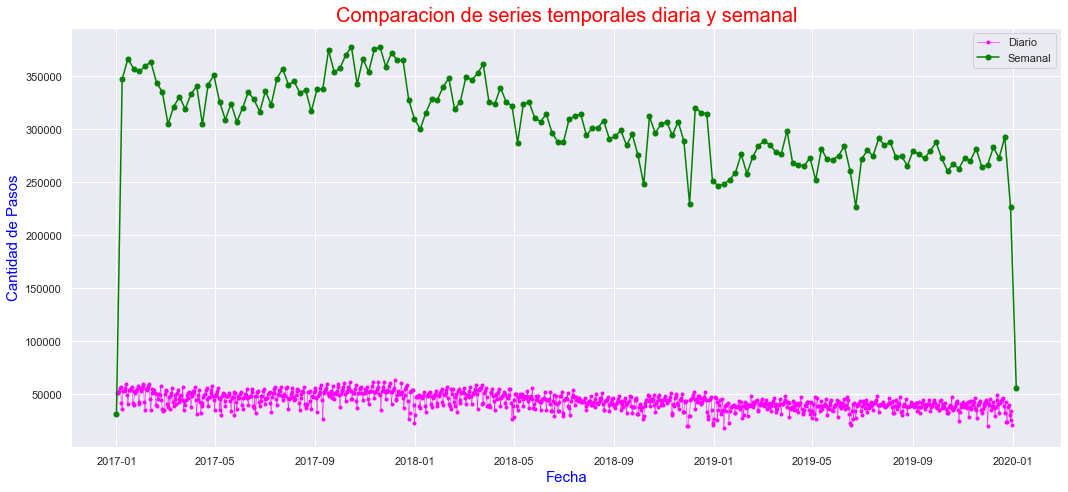

In [62]:

fig,eje = plt.subplots(figsize = (15,7))
eje.plot(diario,marker='.',linestyle='-',linewidth=0.5,label='Diario', color='magenta')
eje.plot(semanal,marker='o',markersize=5,label='Semanal', color='green')
eje.set_ylabel('Cantidad de Pasos', color='blue',fontsize= 15 )
eje.set_xlabel('Fecha', color='blue',fontsize= 15 )
eje.legend()
plt.title("Comparacion de series temporales diaria y semanal", color= 'red', fontsize= 20)
plt.tight_layout()
plt.show()

*B- Resampleamos con la media

1. Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable, con el data diarios donde ya realizamos la interpolacion de los datos atipicos

In [63]:
semanal_m =diario.resample('W').mean()
print(semanal_m.shape)
semanal_m

(158, 1)


cantidad_pasos
fecha                     
2017-01-01    31183.000000
2017-01-08    49601.714286
2017-01-15    52344.714286
2017-01-22    51030.714286
2017-01-29    50654.428571
...                    ...
2019-12-08    40413.000000
2019-12-15    38994.285714
2019-12-22    41840.142857
2019-12-29    32341.428571
2020-01-05    27985.000000

[158 rows x 1 columns]

2.Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable, con el dataset original

In [64]:
diario_1 = dataset.resample('D', on = 'fecha').sum()
semanal_1_m =diario_1.resample('W').mean()
print(semanal_1_m.shape)
semanal_1_m

(158, 1)


cantidad_pasos
fecha                     
2017-01-01    31183.000000
2017-01-08    49601.714286
2017-01-15    52344.714286
2017-01-22    51030.714286
2017-01-29    50654.428571
...                    ...
2019-12-08    40413.000000
2019-12-15    38994.285714
2019-12-22    41840.142857
2019-12-29    32341.428571
2020-01-05    27985.000000

[158 rows x 1 columns]

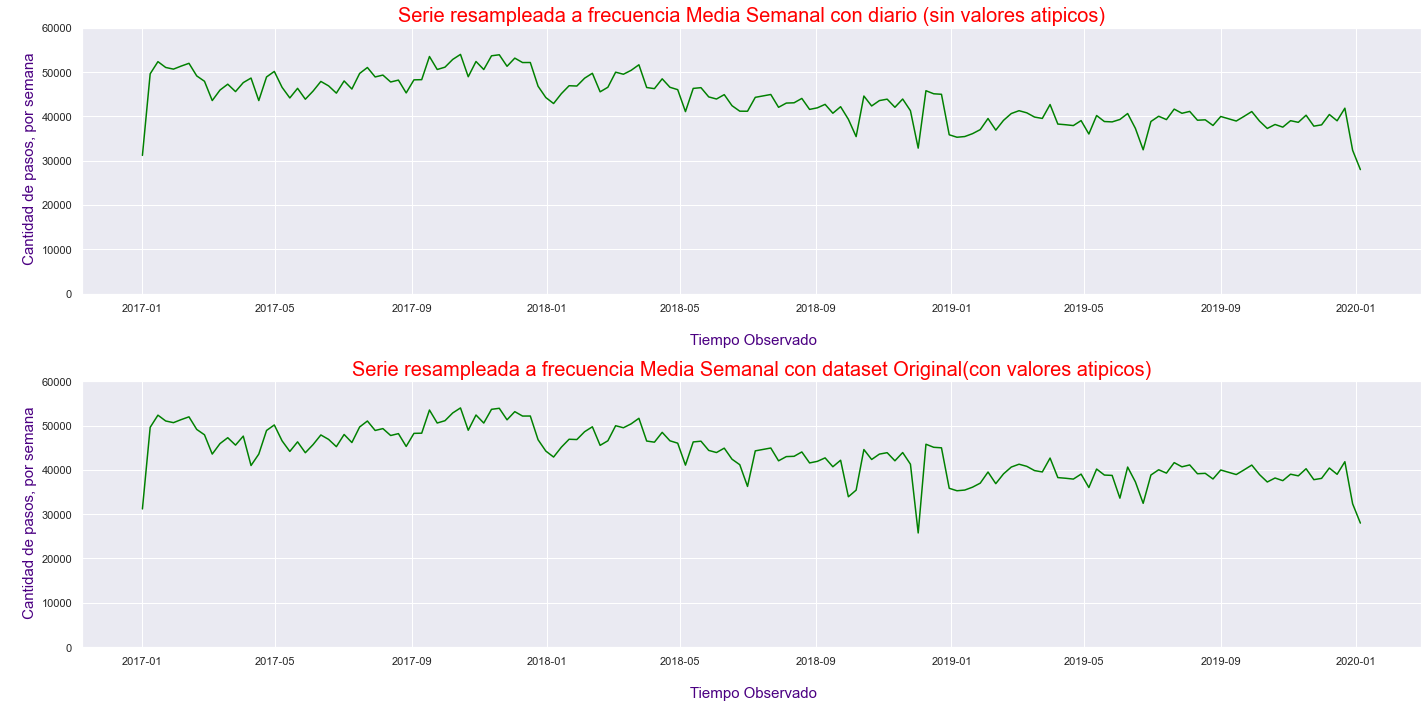

In [65]:
plt.figure(figsize = (20,10))
Gs= gridspec.GridSpec(2,1)
ax0= plt.subplot(Gs[0])
plt.plot(semanal.index, semanal_m.cantidad_pasos,color='green')
plt.title("Serie resampleada a frecuencia Media Semanal con diario (sin valores atipicos)", color= 'red', fontsize= 20)
plt.xlabel('\n Tiempo Observado', color= 'indigo', fontsize= 15)
plt.ylabel('\n Cantidad de pasos, por semana', color= 'indigo', fontsize= 15)
plt.ylim(0,60000)
ax1= plt.subplot(Gs[1])
plt.plot(semanal_1.index, semanal_1_m.cantidad_pasos,color='green')
plt.title("Serie resampleada a frecuencia Media Semanal con dataset Original(con valores atipicos)", color= 'red', fontsize= 20)
plt.xlabel('\n Tiempo Observado', color= 'indigo', fontsize= 15)
plt.ylabel('\n Cantidad de pasos, por semana', color= 'indigo', fontsize= 15)
plt.ylim(0,60000)
plt.tight_layout()
plt.show()

***Graficamos la Serie Temporal Diaria y la Serie Media Semanal resamplada con la Media***

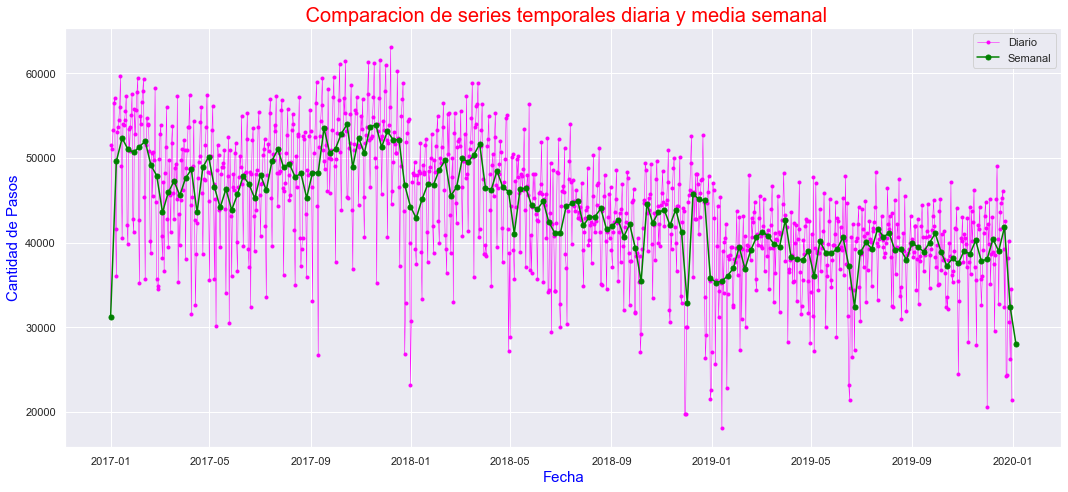

In [66]:

fig,eje = plt.subplots(figsize = (15,7))
eje.plot(diario,marker='.',linestyle='-',linewidth=0.5,label='Diario', color='magenta')
eje.plot(semanal_m,marker='o',markersize=5,label='Semanal', color='green')
eje.set_ylabel('Cantidad de Pasos', color='blue',fontsize= 15 )
eje.set_xlabel('Fecha', color='blue',fontsize= 15 )
plt.legend()
plt.title(" Comparacion de series temporales diaria y media semanal", color= 'red', fontsize= 20)
plt.tight_layout()
plt.show()

***Se puede observar que las medias para las series temporales semanales son más suaves que para las series temporales diarias porque se ha promediado una variabilidad de frecuencia más alta en el remuestreo.***

** Antes los resultados obtenidos, y entendiendo que siempre es mejor trabajar con la media de pases por semana. Por lo tanto en nuestros modelos trabajaremos con la forma resampleada en media Semanal 

## Componentes de la Serie

### Descomposición de la serie

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [68]:
import statsmodels.tsa as tsa
# Multiplicative Decomposition 
result_mul = tsa.seasonal.seasonal_decompose(diario.cantidad_pasos, model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = tsa.seasonal.seasonal_decompose(diario.cantidad_pasos, model='additive', extrapolate_trend='freq')

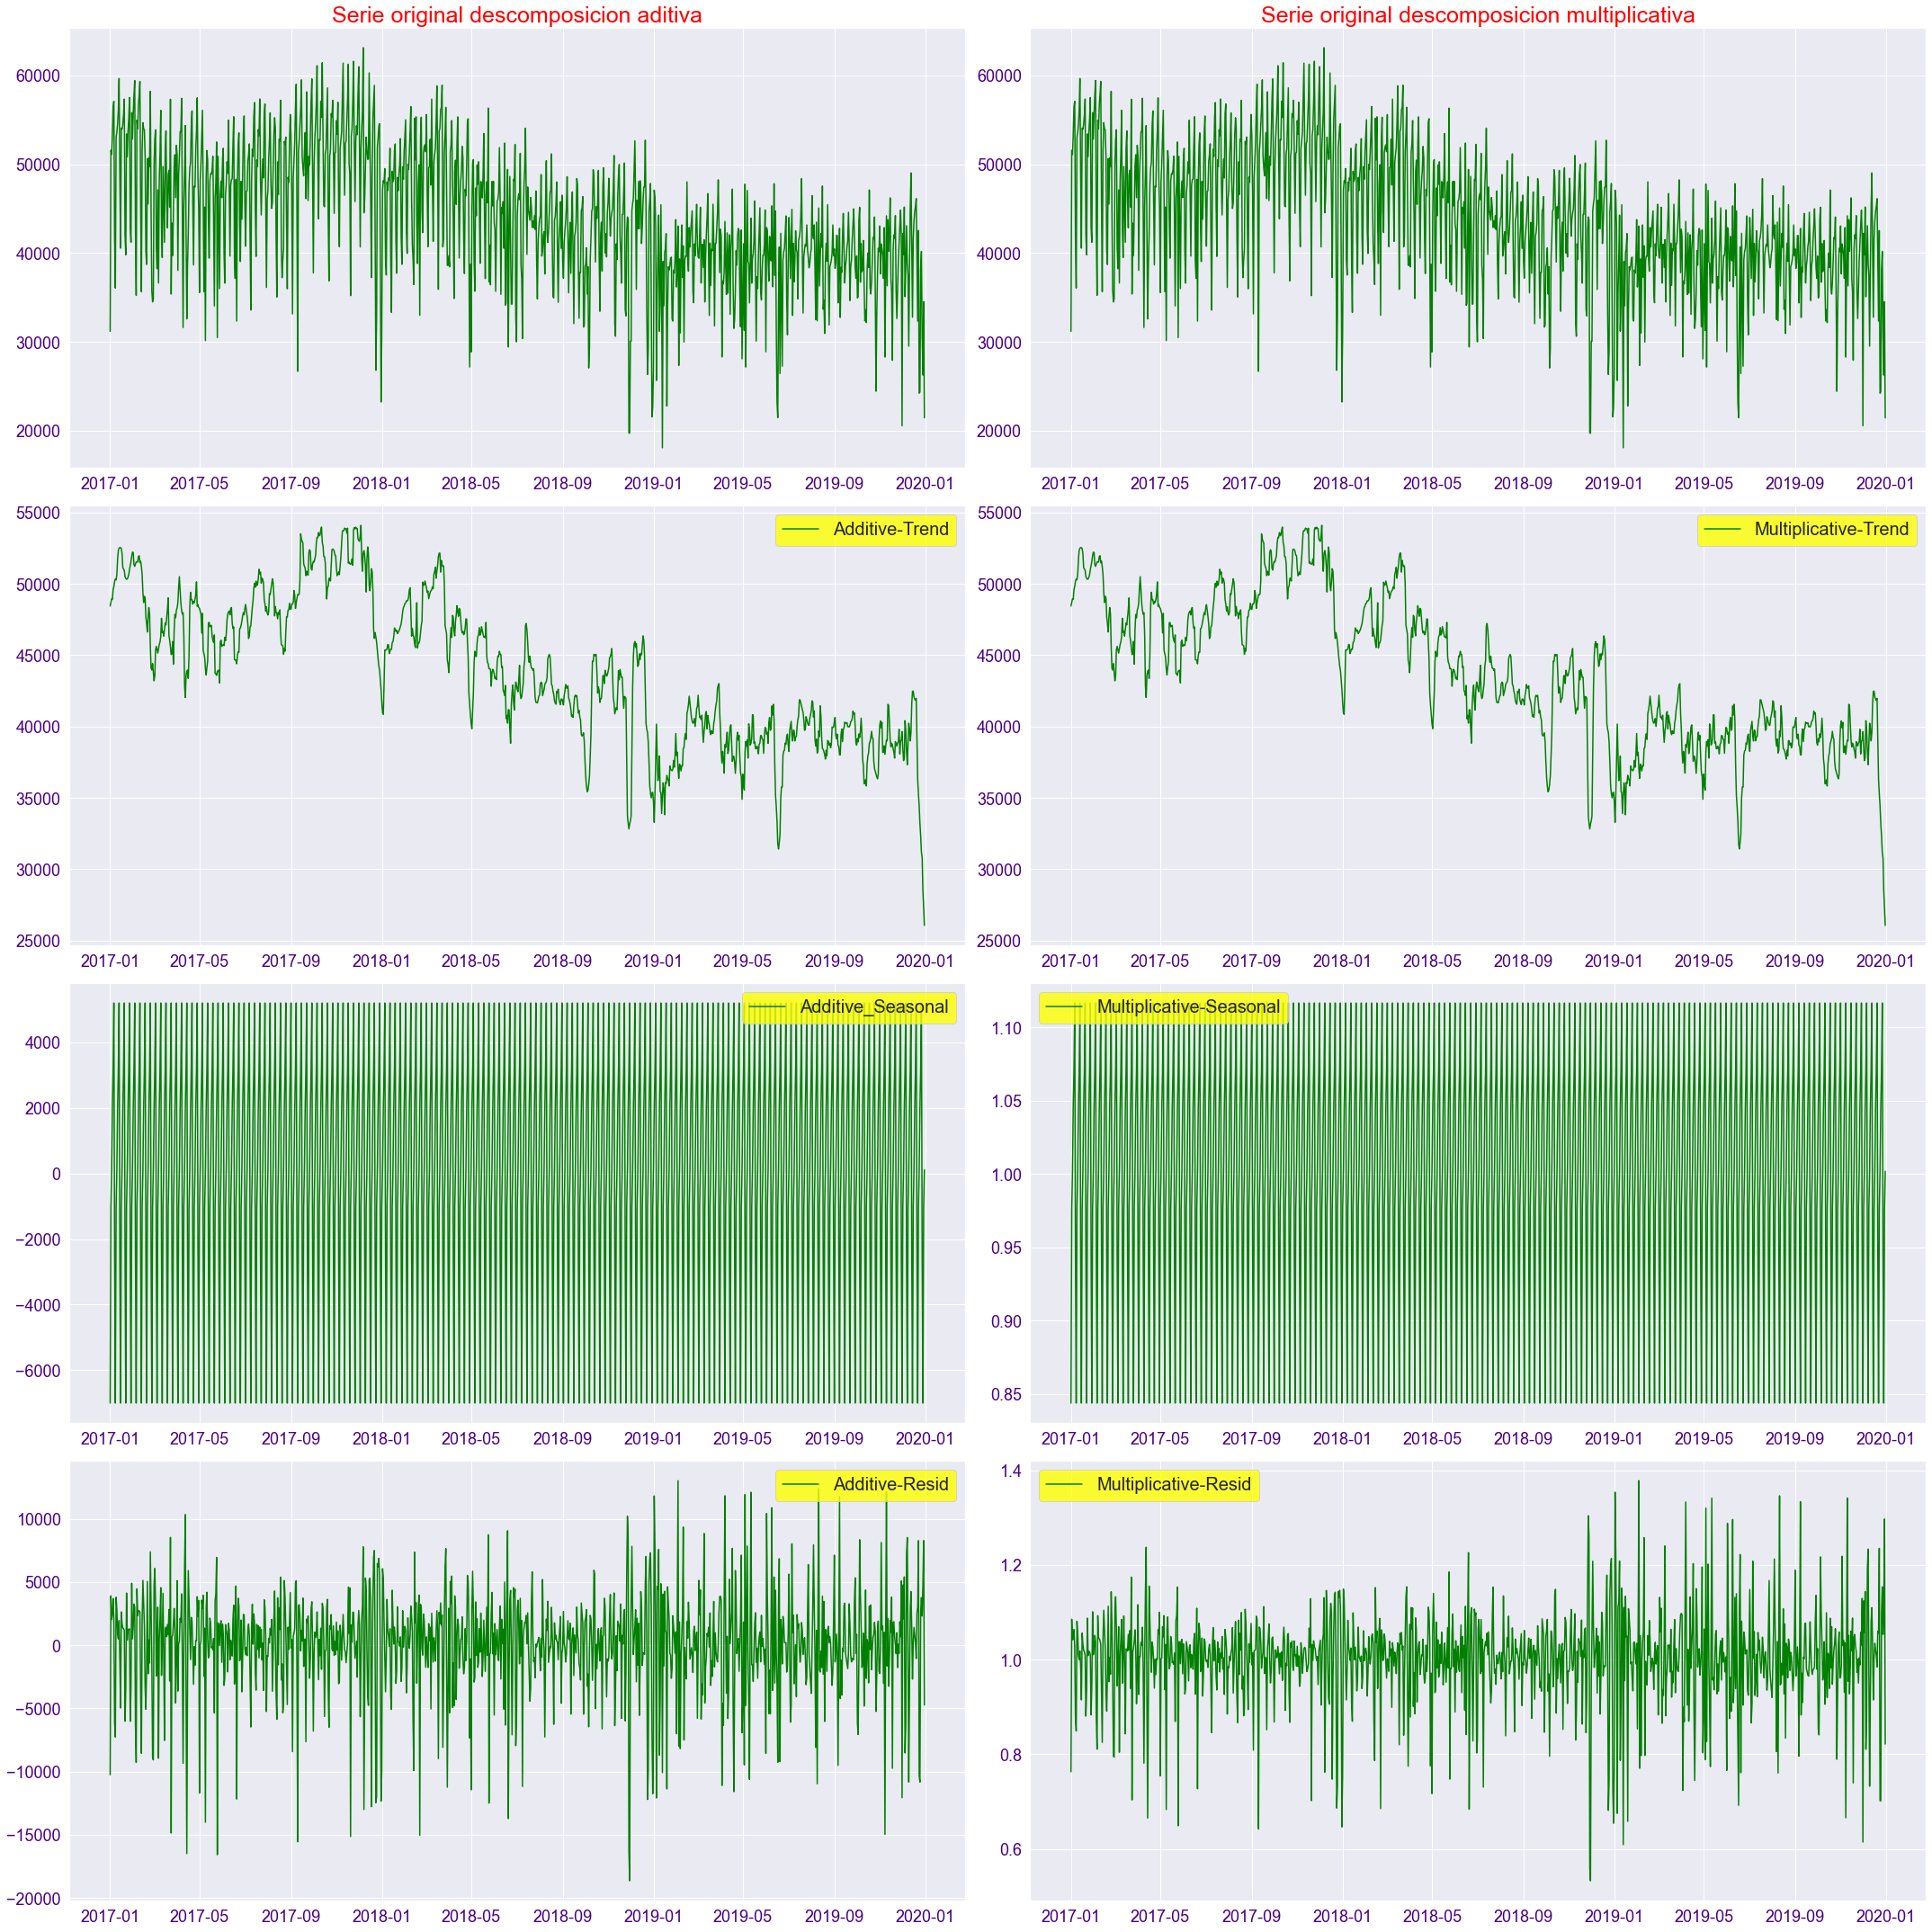

In [69]:
plt.figure(figsize = (30,30))
Gs= gridspec.GridSpec(4,2)

ax0= plt.subplot(Gs[0])
plt.plot(diario,color='green')
plt.title("Serie original descomposicion aditiva", color= 'red', fontsize= 25)
plt.xticks( color= 'indigo', fontsize= 18)
plt.yticks( color= 'indigo', fontsize= 18)

ax1= plt.subplot(Gs[1])
plt.plot(diario,color='green')
plt.title("Serie original descomposicion multiplicativa", color= 'red', fontsize= 25)
plt.xticks( color= 'indigo', fontsize= 18)
plt.yticks( color= 'indigo', fontsize= 18)

ax2= plt.subplot(Gs[2])
plt.plot(result_add.trend,color='green', label="Additive-Trend")
plt.legend(fontsize=20, facecolor= 'yellow')
plt.xticks( color= 'indigo', fontsize= 18)
plt.yticks( color= 'indigo', fontsize= 18)

ax3= plt.subplot(Gs[3])
plt.plot(result_mul.trend,color='green', label='Multiplicative-Trend')
plt.legend(fontsize=20, facecolor= 'yellow')
plt.xticks( color= 'indigo', fontsize= 18)
plt.yticks( color= 'indigo', fontsize= 18)

ax4= plt.subplot(Gs[4])
plt.plot(result_add.seasonal,color='green', label='Additive_Seasonal')
plt.legend(fontsize=20, facecolor= 'yellow')
plt.xticks( color= 'indigo', fontsize= 18)
plt.yticks( color= 'indigo', fontsize= 18)


ax5= plt.subplot(Gs[5])
plt.plot(result_mul.seasonal,color='green', label='Multiplicative-Seasonal')
plt.legend(fontsize=20, facecolor= 'yellow')
plt.xticks( color= 'indigo', fontsize= 18)
plt.yticks( color= 'indigo', fontsize= 18)

ax6= plt.subplot(Gs[6])
plt.plot(result_add.resid,color='green', label='Additive-Resid')
plt.legend(fontsize=20, facecolor= 'yellow', loc= 1)
plt.xticks( color= 'indigo', fontsize= 18)
plt.yticks( color= 'indigo', fontsize= 18)

ax7= plt.subplot(Gs[7])
plt.plot(result_mul.resid,color='green', label='Multiplicative-Resid')
plt.legend(fontsize=20, facecolor= 'yellow', loc= 2)
plt.xticks( color= 'indigo', fontsize= 18)
plt.yticks( color= 'indigo', fontsize= 18)


plt.tight_layout()
plt.show()

* _*Al descomponer la Serie con distintos modelos, en si los graficos observados son muy parecidos. Con la diferencia que en el modelo 'Aditivo' los resultantes "residuoss" tienen un comportamiento completamente aleatorio y una media  en 0 (cero). Estos indicios indican que estamos ante la presencia de "Ruido blando", al contrario de los "residuos" devueltos con el modelo "Multiplicativo".*_
***** Una de las formas de describir el Ruido blanco es como una señal aleatoria (proceso estocástico) que se caracteriza por el hecho de que sus valores de señal en dos tiempos diferentes no guardan correlación estadística. 

* Descomposicion Aditiva de la Media Semanal

In [70]:
result = seasonal_decompose(semanal_m.cantidad_pasos, model='additive')

In [71]:
result.trend

fecha
2017-01-01   NaN
2017-01-08   NaN
2017-01-15   NaN
2017-01-22   NaN
2017-01-29   NaN
              ..
2019-12-08   NaN
2019-12-15   NaN
2019-12-22   NaN
2019-12-29   NaN
2020-01-05   NaN
Freq: W-SUN, Name: trend, Length: 158, dtype: float64

In [72]:
result.seasonal

fecha
2017-01-01   -4360.102709
2017-01-08   -5237.804632
2017-01-15   -3970.977023
2017-01-22   -2652.969468
2017-01-29   -2144.821803
                 ...     
2019-12-08    4268.610203
2019-12-15    4009.297703
2019-12-22    1383.071054
2019-12-29   -4360.102709
2020-01-05   -5237.804632
Freq: W-SUN, Name: seasonal, Length: 158, dtype: float64

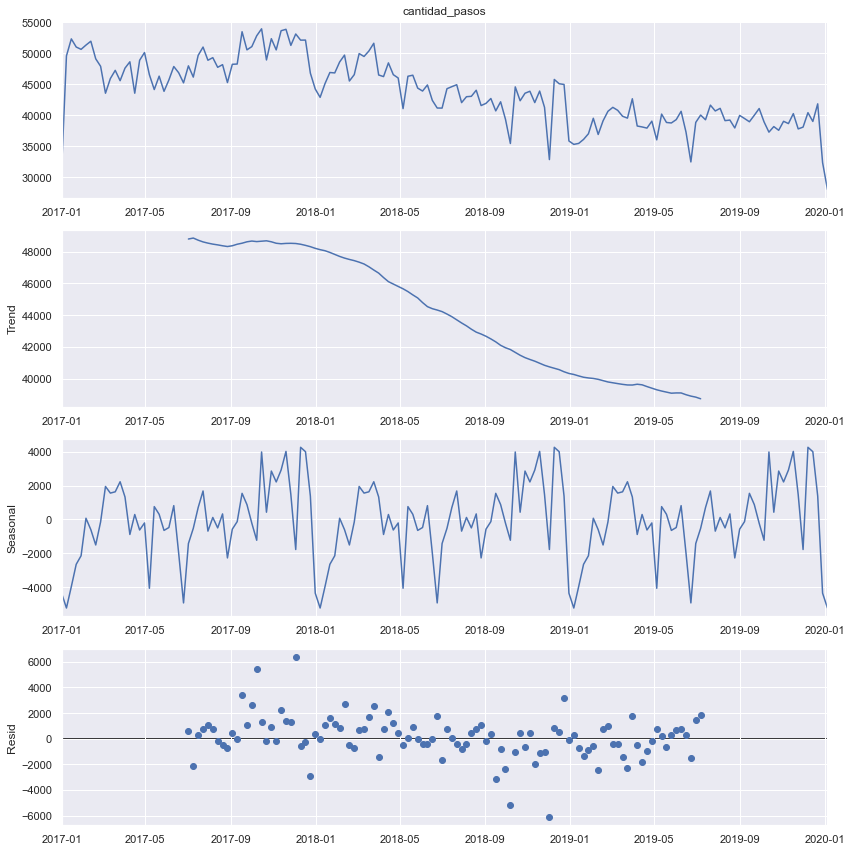

In [73]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

***** El gráfico anterior muestra claramente que la cantidad de pasos  es inestable, junto con su evidente estacionalidad, que es anual
* 1- En el primer gráfico vemos la serie tal como nos la presentan*
* 2- Trend: vemos la tendencia de la serie, que ya hemos demostrado que es negativa*
* 3- Seasonal: vemos la estacionalidad de la serie, que claramente es anual*
* 4- Resid: vemos los residuas de la serie,se encuentran sin correlacion alguna y el promedio en general se encuentra fijo en 0 (cero), o sea denota Ruido Blanco.  *el ruido blanco es completamente aleatorio con una media de 0. En ruido blanco no hay patrón alguno**




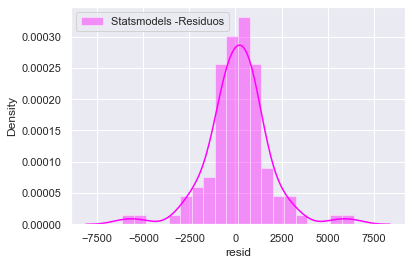

In [74]:
plt.figure(figsize = (6,4))
sns.distplot(result.resid, bins = 20, color='magenta', label="Statsmodels -Residuos")

plt.legend()
plt.show()

* Observamos que los residuos tienen una distribucion normal *

### Autocorrelacion

In [75]:
from statsmodels.tsa.stattools import acf

In [76]:
nlags =  52*3
autocorr = acf(semanal_m.cantidad_pasos, nlags = nlags)

In [77]:
autocorr.shape

(157,)

Text(0.5, 0, 'lag')

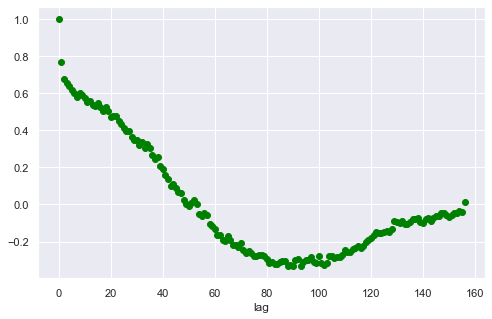

In [78]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr,color='green')
plt.xlabel('lag')

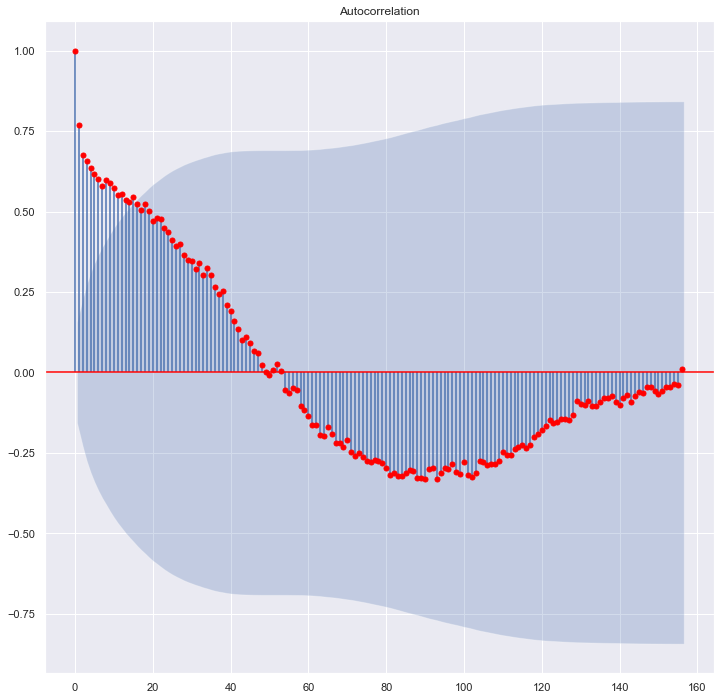

In [79]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(semanal_m.cantidad_pasos, lags = 52*3, color='red')
plt.show()

##### La autocorrelación o dependencia secuencial es una herramienta estadística utilizada frecuentemente en el procesado de señales.
La función de autocorrelación se define como la correlación cruzada de la señal consigo misma. La función de autocorrelación resulta de gran utilidad para encontrar patrones repetitivos dentro de una señal, como la periodicidad de una señal enmascarada bajo el ruido o para identificar la frecuencia fundamental de una señal que no contiene dicha componente, pero aparecen numerosas frecuencias armónicas de esta.
La autocorrelación es simplemente la correlación de una serie con sus propios rezagos. Si una serie está significativamente autocorrelacionada, eso significa que los valores anteriores de la serie (rezagos) pueden ser útiles para predecir el valor actual.

## Predicciones a Futuro

### Ultimo Trimestre 2019

#### Modelos Benchmark

###### La metrica de Evaluacion elegida es RMSE dado el manejo de los valores atipicos que se ha realizado en el preprocesamiento de datos

In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
# 3ª trimestre 2019
fecha_i='2019-07-01'
fecha_f='2019-09-30'
X= semanal_m [(semanal_m.index >=fecha_i)&(semanal_m.index <=fecha_f)]

# 4º trimestre 2019 = Ultimo trimestre  2019
fecha_i='2019-10-01'
fecha_f='2019-12-31'
y=semanal_m [(semanal_m.index >=fecha_i)&(semanal_m.index <=fecha_f)]

y_t=X.cantidad_pasos.rolling(window=1, center=True).mean()
b_rmse=np.sqrt(mean_squared_error(y, y_t))

---------------------------------
RMSE en Benchmark: 2999.8287232635216
---------------------------------


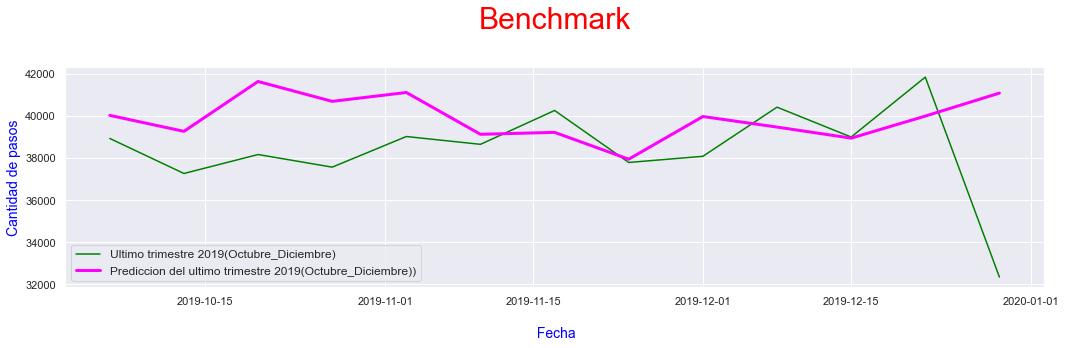

In [82]:
print('---------------------------------')
print(f'RMSE en Benchmark: {b_rmse}')
print('---------------------------------')

plt.figure(figsize=(15,5))
plt.plot(y.index, y.cantidad_pasos,color='green', label='Ultimo trimestre 2019(Octubre_Diciembre)')
plt.plot(y.index, y_t, lw=3, color='magenta',label='Prediccion del ultimo trimestre 2019(Octubre_Diciembre))')
plt.title ('Benchmark\n', color='red', fontsize=30)
plt.xlabel('\n Fecha', color='blue',fontsize=14)
plt.ylabel('Cantidad de pasos', color='blue',fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

*Preparando los datos*

* Realizamos una máscara para tomar semnas enteras, ya que al hcer un búsqueda por fuera del DS, vemos que la primera y la última son semanas incompletas*

In [83]:
semanal_m=semanal_m[(semanal_m.index >='2017-01-08')&(semanal_m.index <='2019-12-29')]
semanal_m

cantidad_pasos
fecha                     
2017-01-08    49601.714286
2017-01-15    52344.714286
2017-01-22    51030.714286
2017-01-29    50654.428571
2017-02-05    51343.000000
...                    ...
2019-12-01    38079.285714
2019-12-08    40413.000000
2019-12-15    38994.285714
2019-12-22    41840.142857
2019-12-29    32341.428571

[156 rows x 1 columns]

In [84]:
senial = semanal_m.cantidad_pasos
senial

fecha
2017-01-08    49601.714286
2017-01-15    52344.714286
2017-01-22    51030.714286
2017-01-29    50654.428571
2017-02-05    51343.000000
                  ...     
2019-12-01    38079.285714
2019-12-08    40413.000000
2019-12-15    38994.285714
2019-12-22    41840.142857
2019-12-29    32341.428571
Freq: W-SUN, Name: cantidad_pasos, Length: 156, dtype: float64

In [85]:
senial.shape

(156,)

En primer lugar, debemos definir cuántos valores *hacia atrás* tomaremos.

In [86]:
look_back = 12 # usamos 12 semanas de datos para predecir el valor siguiente

In [87]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(143, 12) (143,)


In [88]:
for i in range(X.shape[0]):
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [89]:
print(X)

[[49601.71428571 52344.71428571 51030.71428571 ... 45927.71428571
  47256.28571429 45583.28571429]
 [52344.71428571 51030.71428571 50654.42857143 ... 47256.28571429
  45583.28571429 47613.85714286]
 [51030.71428571 50654.42857143 51343.         ... 45583.28571429
  47613.85714286 48639.57142857]
 ...
 [38941.71428571 39989.57142857 41081.14285714 ... 40255.71428571
  37785.71428571 38079.28571429]
 [39989.57142857 41081.14285714 38926.14285714 ... 37785.71428571
  38079.28571429 40413.        ]
 [41081.14285714 38926.14285714 37262.85714286 ... 38079.28571429
  40413.         38994.28571429]]


In [90]:
print(y)

[47613.85714286 48639.57142857 43558.85714286 48889.28571429
 50135.14285714 46553.57142857 44153.14285714 46320.
 43864.85714286 45705.28571429 47878.14285714 46874.57142857
 45235.85714286 47985.71428571 46165.57142857 49681.42857143
 51022.28571429 48891.42857143 49309.14285714 47749.28571429
 48177.57142857 45283.85714286 48237.         48276.14285714
 53502.85714286 50571.28571429 51095.85714286 52845.42857143
 53976.         48938.71428571 52378.57142857 50563.85714286
 53663.42857143 53894.71428571 51293.28571429 53138.57142857
 52141.57142857 52151.85714286 46800.28571429 44241.71428571
 42891.71428571 45111.42857143 46908.42857143 46841.
 48610.71428571 49720.57142857 45533.28571429 46566.57142857
 49966.85714286 49500.85714286 50387.57142857 51637.85714286
 46506.42857143 46246.42857143 48465.         46557.71428571
 46022.         41067.14285714 46302.14285714 46472.
 44387.         43909.85714286 44898.71428571 42404.85714286
 41164.85714286 41151.71428571 44287.42857143 44

Hacemos el train/test split.

In [91]:
N_train = 143 - look_back # cantidad de instancias que vamos a usar para entrenar. look_back = 12 semanas 
N_test = 12  #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(131, 12) (131,)
(12, 12) (12,)


In [92]:
y_test = y[N_train:N_train+N_test]
print(y_test)

[38926.14285714 37262.85714286 38163.85714286 37564.28571429
 39018.42857143 38648.         40255.71428571 37785.71428571
 38079.28571429 40413.         38994.28571429 41840.14285714]


#### RandomForestRegressor

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor( random_state=42, n_jobs = -1)

In [94]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [95]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

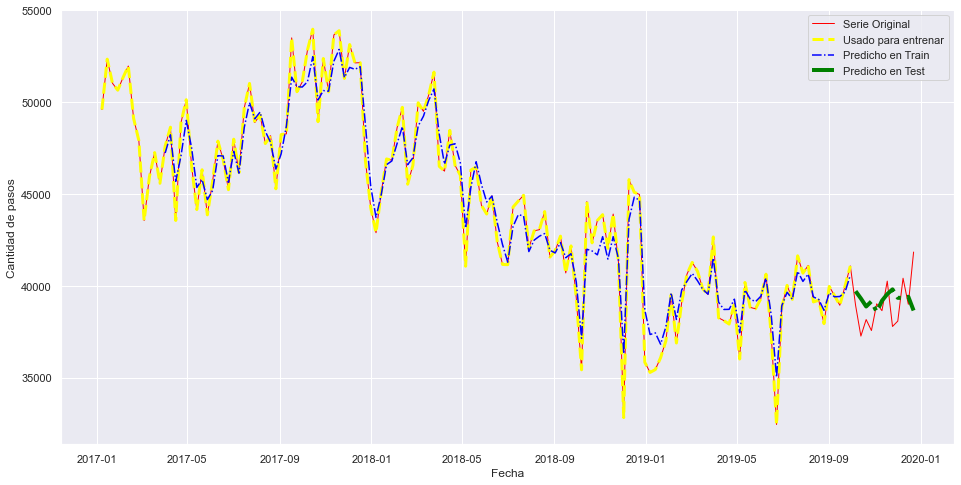

RMSE RFR en Train: 1042.1972621161167
RMSE RFR en Test: 1470.7831574657907


In [96]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',color='blue',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse =np.sqrt( mean_squared_error(y_train, y_train_pred))
print('RMSE RFR en Train:',rmse)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE RFR en Test:',rmse)

###### Buscando los mejores hiperparámetros

In [97]:
from sklearn.model_selection import  GridSearchCV, TimeSeriesSplit
tss= TimeSeriesSplit(n_splits=2)

In [98]:
param_grid = {'n_estimators':[ 20, 50,100,200],
              'max_depth': [i for i in range(2,20)],
              'max_features': ['auto', 'sqrt', 'log2'], 
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 6]} 
rf_reg=RandomForestRegressor(random_state=42)
rf_gs =GridSearchCV(rf_reg, param_grid, scoring='neg_root_mean_squared_error', cv=tss,verbose=5,n_jobs=-1)

In [99]:
rf_gs.fit(X_train,y_train)

Fitting 2 folds for each of 2592 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | ela

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=2),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 100, 200]},
             scoring='neg_root_mean_squared_error', verbose=5)

In [100]:
pd.DataFrame(rf_gs.cv_results_).sort_values('rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
735        0.422045      0.018000         0.023001        0.004001   
1455       0.546911      0.015623         0.023440        0.007818   
2031       0.523476      0.007814         0.023439        0.007813   
1311       0.625048      0.046881         0.054690        0.007810   
2319       0.587739      0.031167         0.024999        0.002000   

     param_max_depth param_max_features param_min_samples_leaf  \
735                7               auto                      2   
1455              12               auto                      2   
2031              16               auto                      2   
1311              11               auto                      2   
2319              18               auto                      2   

     param_min_samples_split param_n_estimators  \
735                        2                200   
1455                       2                200   
2031                       2                200   
1311                       2                200   
2319                       2                200   

                                                 params  split0_test_score  \
735   {'max_depth': 7, 'max_features': 'auto', 'min_...       -4302.044641   
1455  {'max_depth': 12, 'max_features': 'auto', 'min...       -4300.488629   
2031  {'max_depth': 16, 'max_features': 'auto', 'min...       -4300.488629   
1311  {'max_depth': 11, 'max_features': 'auto', 'min...       -4300.488629   
2319  {'max_depth': 18, 'max_features': 'auto', 'min...       -4300.488629   

      split1_test_score  mean_test_score  std_test_score  rank_test_score  
735        -2845.932922     -3573.988782      728.055859                1  
1455       -2848.282807     -3574.385718      726.102911                2  
2031       -2848.282807     -3574.385718      726.102911                2  
1311       -2848.282807     -3574.385718      726.102911                2  
2319       -2848.282807     -3574.385718      726.102911                2

In [101]:
abs(rf_gs.best_score_)

3573.9887817430063

In [102]:
rf_gs.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

##### Aplicando los hiperparametros


In [103]:
rf_h = RandomForestRegressor(max_depth= 7,
                             max_features= 'auto',
                             n_estimators= 200, 
                             random_state=42,
                             min_samples_leaf=2,
                             min_samples_split= 2,
                             n_jobs = -1)

In [104]:
rf_h.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=2, n_estimators=200,
                      n_jobs=-1, random_state=42)

In [105]:
y_train_pred = rf_h.predict(X_train)
y_test_pred = rf_h.predict(X_test)

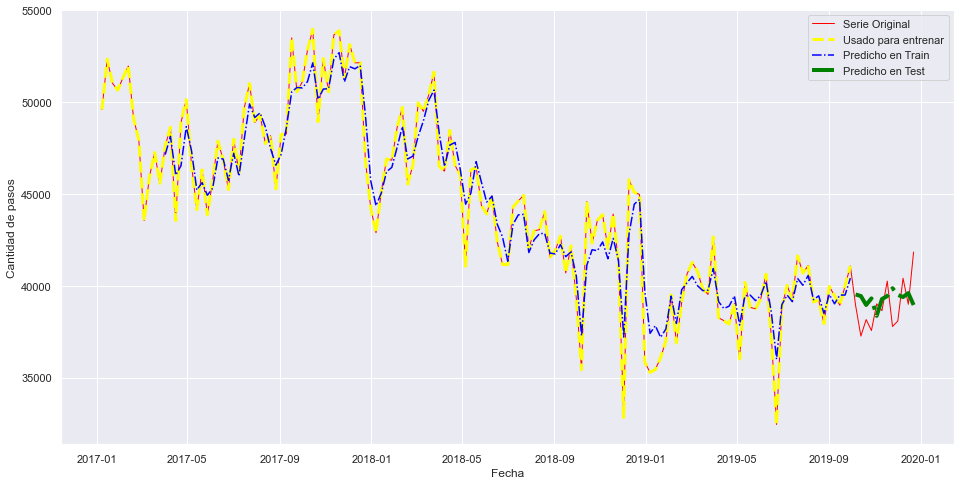

RMSE RFR en Train: 1274.2477878667385
RMSE RFR en Test: 1484.0102828408933


In [106]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',color='blue',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('RMSE RFR en Train:',rmse)

rmse =np.sqrt( mean_squared_error(y_test, y_test_pred))
print('RMSE RFR en Test:',rmse)

* Observamos que los hiperparametros elegidos por el GS no reducen el error*
* Se realiza busqueda manual de los hiperparametros*

In [107]:
rf_h_1 = RandomForestRegressor(max_depth=5,
                             max_features= 'auto',
                             n_estimators=200, 
                             random_state=42,
                             min_samples_leaf=2,
                             min_samples_split= 4,
                             n_jobs = -1)

In [108]:
rf_h_1.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=200, n_jobs=-1, random_state=42)

In [109]:

y_train_pred = rf_h_1.predict(X_train)
y_test_pred = rf_h_1.predict(X_test)

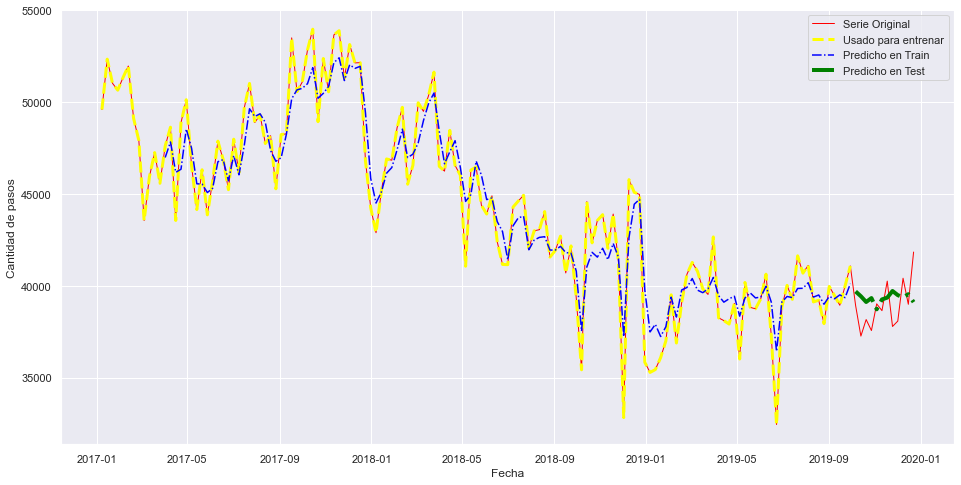

RMSE RFR en Train: 1423.0470320974262
RMSE RFR en Test: 1448.6053745383088


In [110]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',color='blue',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('RMSE RFR en Train:',rmse)

rmse_rf =np.sqrt( mean_squared_error(y_test, y_test_pred))
print('RMSE RFR en Test:',rmse_rf)

*** Conclusiòn de RandomForestRegressor: Se observa una leve mejoria del RMSE en el Test al hacer una busqueda manual de los hiperparámetros. En cuanto si comparamos con el Benchmarck se observa una reduccion de casi el 50% del RMSE*

##### *Feature Importance del Modelo*

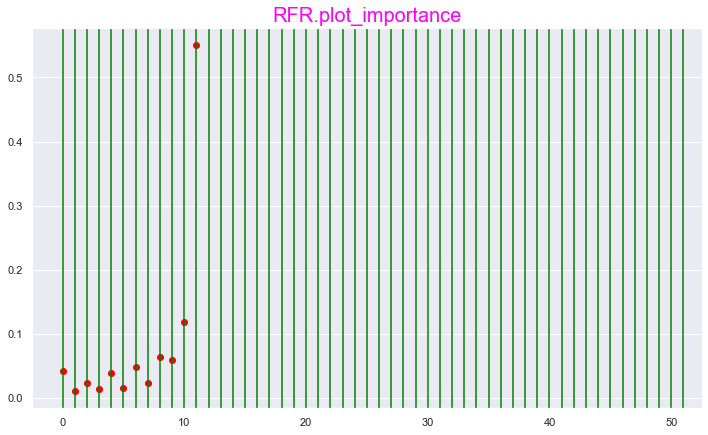

In [111]:
plt.figure(figsize = (12,7))

plt.scatter(np.arange(rf_h_1.feature_importances_.size),rf_h_1.feature_importances_,color='red')
plt . title ( "RFR.plot_importance",color='magenta',size=20 ) 
for x in range(52):
    plt.axvline(x, linestyle ='-', color= 'green')
    
plt.show()

* Si observamos la importancia de las características que devuelve RFR, vemos que de las 12 semanas usadas para predecir, las dos ultimas semans son las mas relevantes*

#### XGBoostRegressor

In [112]:
import xgboost as xgb
from xgboost import XGBRegressor

In [113]:
xgb=XGBRegressor(objective = 'reg:squarederror',random_state=42)


In [114]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [115]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

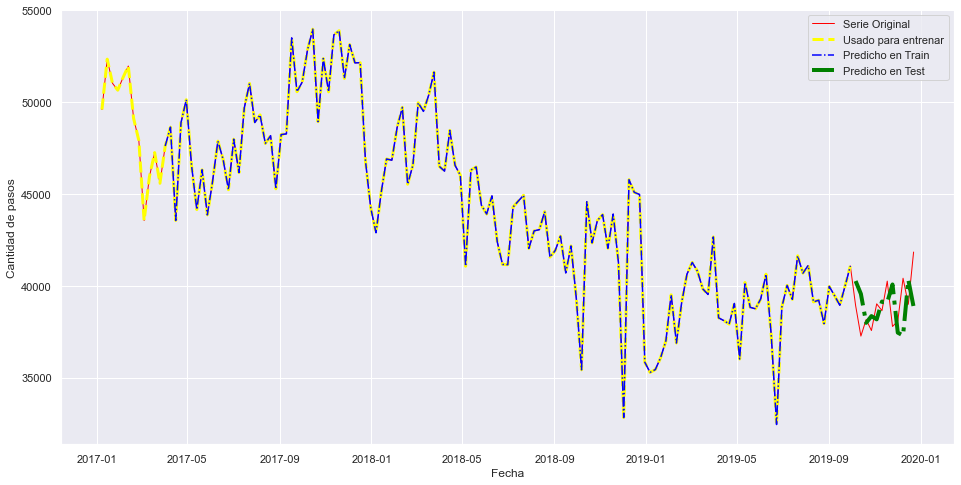

RMSE XGB en Train: 0.15879993227124714
RMSE XGB en Test: 1732.7741913957211


In [116]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',color='blue',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse =np.sqrt( mean_squared_error(y_train, y_train_pred))
print('RMSE XGB en Train:',rmse)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE XGB en Test:',rmse)

##### Buscando los mejores hiperparametros


In [117]:
param_grid = {'nthread': [4],
              'objective': ['reg:squarederror'],
              'learning_rate': [0.1,0.2,0.3],
              'max_depth':[4,5,6,7],
              'min_child_weight': [1,2,3,4],
              'subsample':[0.5,0.7,0.8,0.9,1],
              'colsample_bytree':[0.5,0.7,1],
              'reg_lambda':[1,2,3],
              'n_estimators':[20,50,100,200]} 
xgb_reg=XGBRegressor(random_state=42)
xgb_gs=GridSearchCV(xgb_reg, param_grid, scoring='neg_root_mean_squared_error', cv=tss,verbose=5,n_jobs=-1)

In [118]:
xgb_gs.fit(X_train,y_train)

Fitting 2 folds for each of 8640 candidates, totalling 17280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 1020 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 1668 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 2460 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3396 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4476 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 5700 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 7068 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 8580 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 10236 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 12036 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 13980 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 16068 tasks   

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=2),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, mono...
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7],
 

In [119]:
pd.DataFrame(xgb_gs.cv_results_).sort_values("rank_test_score").head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7081       0.023439      0.007812         0.000000        0.000000   
6841       0.030408      0.014783         0.001500        0.001500   
7561       0.023440      0.007815         0.000000        0.000000   
8295       0.046878      0.000001         0.007813        0.007813   
8310       0.109382      0.015625         0.000000        0.000000   

     param_colsample_bytree param_learning_rate param_max_depth  \
7081                      1                 0.2               5   
6841                      1                 0.2               4   
7561                      1                 0.2               7   
8295                      1                 0.3               6   
8310                      1                 0.3               6   

     param_min_child_weight param_n_estimators param_nthread  \
7081                      3                 20             4   
6841                      3                 20             4   
7561                      3                 20             4   
8295                      3                 50             4   
8310                      3                100             4   

       param_objective param_reg_lambda param_subsample  \
7081  reg:squarederror                1             0.7   
6841  reg:squarederror                1             0.7   
7561  reg:squarederror                1             0.7   
8295  reg:squarederror                1             0.5   
8310  reg:squarederror                1             0.5   

                                                 params  split0_test_score  \
7081  {'colsample_bytree': 1, 'learning_rate': 0.2, ...       -3072.444496   
6841  {'colsample_bytree': 1, 'learning_rate': 0.2, ...       -3080.391789   
7561  {'colsample_bytree': 1, 'learning_rate': 0.2, ...       -3081.928757   
8295  {'colsample_bytree': 1, 'learning_rate': 0.3, ...       -2940.592875   
8310  {'colsample_bytree': 1, 'learning_rate': 0.3, ...       -2953.249041   

      split1_test_score  mean_test_score  std_test_score  rank_test_score  
7081       -2709.702809     -2891.073652      181.370843                1  
6841       -2732.334626     -2906.363208      174.028582                2  
7561       -2742.392795     -2912.160776      169.767981                3  
8295       -2883.777252     -2912.185064       28.407811                4  
8310       -2911.804800     -2932.526920       20.722120                5

In [120]:
abs(xgb_gs.best_score_)

2891.0736521634376

In [121]:
xgb_gs.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 20,
 'nthread': 4,
 'objective': 'reg:squarederror',
 'reg_lambda': 1,
 'subsample': 0.7}

#### Aplicando los hiperparametros

In [122]:
xgb_h=XGBRegressor(colsample_bytree=1,
                   learning_rate= 0.2,
                   max_depth= 5,
                   min_child_weight= 3,
                   n_estimators= 20,
                   nthread= 4,
                   objective= 'reg:squarederror',
                   n_jobs = -1,
                   random_state=42,
                   reg_lambda= 1,
                   subsample= 0.7)

In [123]:
xgb_h.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=-1, nthread=4, num_parallel_tree=1,
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [124]:
y_train_pred = xgb_h.predict(X_train)
y_test_pred = xgb_h.predict(X_test)

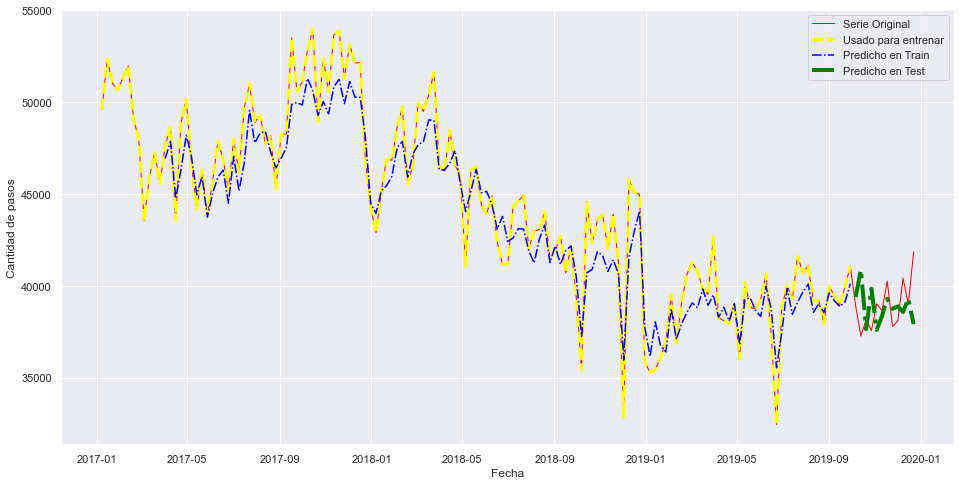

RMSE XGB en Train: 1534.0584211332985
RMSE XGB en Test: 1875.7842218763512


In [125]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',color='blue',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('RMSE XGB en Train:',rmse)

rmse =np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE XGB en Test:',rmse)

*Observamos que los hiperparametros elegidos por el GS no reducen el error*
*Se realiza busqueda manual de los hiperparametros*

In [126]:
xgb_h_1=XGBRegressor(colsample_bytree=1,
                   learning_rate= 0.3,
                   max_depth= 5,
                   min_child_weight= 3,
                   n_estimators= 20,
                   nthread= 4,
                   objective= 'reg:squarederror',
                   n_jobs = -1,
                   random_state=42,
                   reg_lambda= 1,
                   subsample= 0.5)

In [127]:
xgb_h_1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=-1, nthread=4, num_parallel_tree=1,
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.5, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [128]:
y_train_pred = xgb_h_1.predict(X_train)
y_test_pred = xgb_h_1.predict(X_test)

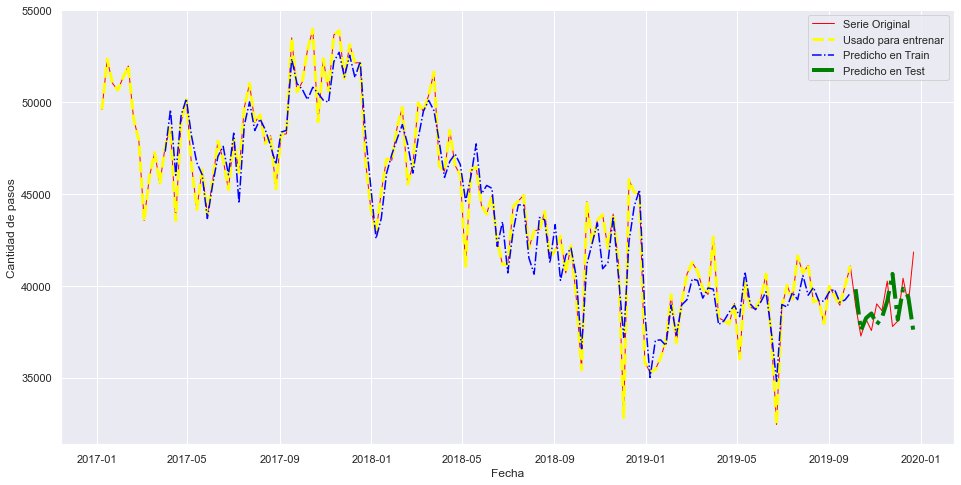

RMSE XGB en Train: 1326.4551836908465
RMSE XGB en Test: 1639.4162286610515


In [129]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',color='blue',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('RMSE XGB en Train:',rmse)

rmse_xgb =np.sqrt( mean_squared_error(y_test, y_test_pred))
print('RMSE XGB en Test:',rmse_xgb)

*** Conclusiòn de XGBoostRegressor: Se observa una leve mejoria del RMSE en el Test al hacer una busqueda manual de los hiperparámetros. En cuanto si comparamos con el Benchmarck se observa una reduccion de casi el 50% del RMSE*


##### *Feature Importance del Modelo*

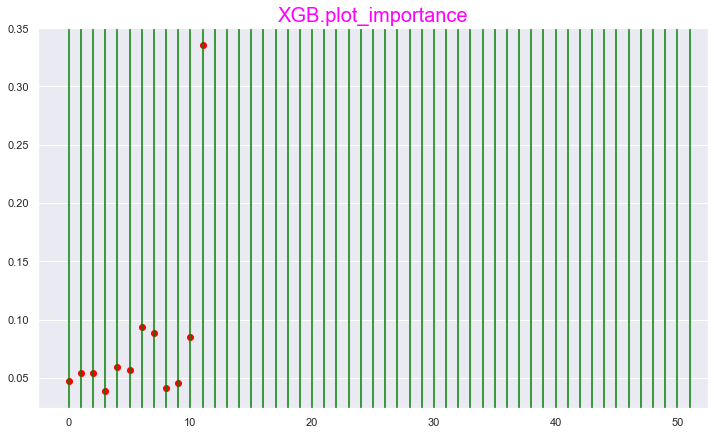

In [130]:
plt.figure(figsize = (12,7))

plt.scatter(np.arange(xgb_h_1.feature_importances_.size),xgb_h_1.feature_importances_,color='red')
plt . title ( "XGB.plot_importance",color='magenta',size=20 ) 
for x in range(52):
    plt.axvline(x, linestyle ='-', color= 'green')
    
plt.show()

* Si observamos la importancia de las características que devuelve XGB, vemos que de las 12 semanas usadas para predecir, la  semana Nº 12  es las mas relevante

#### Arima

*Uno de los métodos más comunes utilizados en la predicción de series de tiempo se conoce como el modelo ARIMA, que significa A utoreg R essive I ntegrado M oving A verage. ARIMA es un modelo que se puede ajustar a datos de series de tiempo para comprender o predecir mejor los puntos futuros de la serie.*

*Hay tres números enteros distintos ( p, d, q) que se utilizan para parametrizar los modelos ARIMA. Por eso, los modelos ARIMA se denotan con la notación ARIMA(p, d, q). Juntos, estos tres parámetros tienen en cuenta la estacionalidad, la tendencia y el ruido en los conjuntos de datos:

*p es la parte auto-regresiva del modelo. Nos permite incorporar el efecto de valores pasados. Seria como Intuitivamente,  afirmar que es probable que haga calor mañana si ha estado caliente los últimos 3 días.

*d es la parte integrada del modelo. Esto incluye términos en el modelo que incorporan la cantidad de diferenciación (es decir, el número de puntos de tiempo pasado para restar del valor actual) para aplicar a la serie de tiempo. Intuitivamente, esto sería similar a afirmar que es probable que mañana tenga la misma temperatura si la diferencia de temperatura en los últimos tres días ha sido muy pequeña.

*q es la parte media móvil del modelo. Esto nos permite establecer el error de nuestro modelo como una combinación lineal de los valores de error observados en puntos de tiempo anteriores en el pasado.

*Cuando se trata de efectos estacionales, utilizamos el ARIMA estacional , que se denota como ARIMA(p,d,q)(P,D,Q)s. O sea  (p, d, q) muestran los parámetros no estacionales descritos anteriormente, aunque (P, D, Q)siguen la misma definición pero se aplican al componente estacional de la serie 

In [131]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

* Uno de los métodos disponibles en Python para modelar y predecir puntos futuros de una serie de tiempo se conoce como SARIMAX , que significa promedios móviles integrados autorregresivos estacionales con regresores eXógenos . 

In [132]:
import itertools
warnings.filterwarnings('ignore')

In [133]:
y=semanal_m
y.head

<bound method NDFrame.head of             cantidad_pasos
fecha                     
2017-01-08    49601.714286
2017-01-15    52344.714286
2017-01-22    51030.714286
2017-01-29    50654.428571
2017-02-05    51343.000000
...                    ...
2019-12-01    38079.285714
2019-12-08    40413.000000
2019-12-15    38994.285714
2019-12-22    41840.142857
2019-12-29    32341.428571

[156 rows x 1 columns]>

In [134]:
y['2019':]

cantidad_pasos
fecha                     
2019-01-06    35284.857143
2019-01-13    35439.571429
2019-01-20    36088.142857
2019-01-27    37002.714286
2019-02-03    39509.714286
2019-02-10    36886.285714
2019-02-17    39094.857143
2019-02-24    40634.142857
2019-03-03    41274.142857
2019-03-10    40792.428571
2019-03-17    39833.428571
2019-03-24    39530.571429
2019-03-31    42662.571429
2019-04-07    38256.714286
2019-04-14    38106.428571
2019-04-21    37917.571429
2019-04-28    39040.285714
2019-05-05    36014.857143
2019-05-12    40183.285714
2019-05-19    38828.000000
2019-05-26    38747.428571
2019-06-02    39291.428571
2019-06-09    40633.142857
2019-06-16    37277.142857
2019-06-23    32446.142857
2019-06-30    38837.857143
2019-07-07    40022.857143
2019-07-14    39264.571429
2019-07-21    41633.000000
2019-07-28    40688.857143
2019-08-04    41110.428571
2019-08-11    39123.857143
2019-08-18    39216.142857
2019-08-25    37942.000000
2019-09-01    39967.857143
2019-09-08    39467.285714
2019-09-15    38941.714286
2019-09-22    39989.571429
2019-09-29    41081.142857
2019-10-06    38926.142857
2019-10-13    37262.857143
2019-10-20    38163.857143
2019-10-27    37564.285714
2019-11-03    39018.428571
2019-11-10    38648.000000
2019-11-17    40255.714286
2019-11-24    37785.714286
2019-12-01    38079.285714
2019-12-08    40413.000000
2019-12-15    38994.285714
2019-12-22    41840.142857
2019-12-29    32341.428571

* d es el orden de integración no estacional de las series temporales.
* D es el orden de integración de las series de tiempo estacionales.
* p es el orden del componente AR no estacional.
* P es el orden del componente AR no estacional.
* q es el orden del componente MA no estacional.
* Q es el orden del componente MA estacional.
* s es la duración de la estcionalidad


In [135]:
d=range(0,3)
p=q=range(8,13)
pdq=list(itertools.product (p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12)
              for x in list(itertools.product (p,d,q)) ]
print('Ejemplos de combinaciones de parametros para SARIMAX ....')
print('SARIMAX:{} x{}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x{}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} x{}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{} x{}'.format(pdq[2],seasonal_pdq[4]))

Ejemplos de combinaciones de parametros para SARIMAX ....
SARIMAX:(8, 0, 9) x(8, 0, 9, 12)
SARIMAX:(8, 0, 9) x(8, 0, 10, 12)
SARIMAX:(8, 0, 10) x(8, 0, 11, 12)
SARIMAX:(8, 0, 10) x(8, 0, 12, 12)


In [ ]:
#d=range(0,3)
#p=q=range(8,13)
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX (y,
                                           order= param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results=mod.fit()
            
            print('SARIMAX{}x{} - AIC:{}'.format(param,param_seasonal, results.aic))
            
        except:
            continue
       

C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(8, 0, 8, 12) - AIC:987.5208350920879


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(8, 0, 9, 12) - AIC:768.3726841343847


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(8, 0, 10, 12) - AIC:554.0293681959572


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(8, 0, 11, 12) - AIC:340.55804594937456


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(8, 0, 12, 12) - AIC:126.8496442809925


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(8, 1, 8, 12) - AIC:781.4008727127425


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(8, 1, 9, 12) - AIC:560.1230199915603


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(8, 1, 10, 12) - AIC:342.6268737807942


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(8, 1, 11, 12) - AIC:126.43947118062762
SARIMAX(8, 0, 8)x(8, 1, 12, 12) - AIC:74.0


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(8, 2, 8, 12) - AIC:586.52073258998


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(8, 2, 9, 12) - AIC:356.71381441386177
SARIMAX(8, 0, 8)x(8, 2, 10, 12) - AIC:127.71947104088818
SARIMAX(8, 0, 8)x(8, 2, 11, 12) - AIC:72.0
SARIMAX(8, 0, 8)x(8, 2, 12, 12) - AIC:74.0


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(9, 0, 8, 12) - AIC:789.2756914955653


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(9, 0, 9, 12) - AIC:769.8641443324241


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(9, 0, 10, 12) - AIC:555.026188381875


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(9, 0, 11, 12) - AIC:342.2036904005427


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(9, 0, 12, 12) - AIC:128.7081080379793


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(9, 1, 8, 12) - AIC:577.7898722542482


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(9, 1, 9, 12) - AIC:562.0818301016986


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(9, 1, 10, 12) - AIC:344.23153595596085
SARIMAX(8, 0, 8)x(9, 1, 11, 12) - AIC:128.43955104308563
SARIMAX(8, 0, 8)x(9, 1, 12, 12) - AIC:76.0


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(9, 2, 8, 12) - AIC:376.2004421370593


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(9, 2, 9, 12) - AIC:358.65273376767516
SARIMAX(8, 0, 8)x(9, 2, 10, 12) - AIC:129.71945664806424
SARIMAX(8, 0, 8)x(9, 2, 11, 12) - AIC:74.0
SARIMAX(8, 0, 8)x(9, 2, 12, 12) - AIC:76.0


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(10, 0, 8, 12) - AIC:573.0170803027406


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(10, 0, 9, 12) - AIC:572.9181590224752


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(10, 0, 10, 12) - AIC:557.9547764482395


C:\Users\Usuario\anaconda3\envs\daScience\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX(8, 0, 8)x(11, 1, 9, 12) - AIC:146.5860710960727


***** Estas son advertencias que mostramos como una forma de alertarle de que puede estar en una situación no estándar. Lo más probable es que uno de sus parámetros de varianza converja a cero. Si obtiene un resultado de modelo y las estimaciones de los parámetros y los errores estándar son finitos, creo que puede usarlos e ignorar todas las advertencias. Tenga en cuenta que la inferencia de los parámetros de varianza no es significativa cuando la estimación puntual es igual o cercana a cero

* Al evaluar y comparar modelos estadísticos equipados con diferentes parámetros, cada uno puede clasificarse entre sí en función de qué tan bien se ajusta a los datos o su capacidad para predecir con precisión puntos de datos futuros. Usaremos el valor AIC(Criterio de información de Akaike), que se devuelve convenientemente con los modelos ARIMA equipados con statsmodels. Las AIC medidas de la eficacia de un modelo se ajusta a los datos, teniendo en cuenta la complejidad global del modelo. A un modelo que se ajusta muy bien a los datos mientras usa muchas características se le asignará una puntuación AIC mayor que a un modelo que usa menos características para lograr la misma bondad de ajuste. Por lo tanto, nos interesa encontrar el modelo que arroje el AIC valor más bajo.
* La calidad relativa de cada modelo es AIC (criterio de información de Akaike), que es un estimador de error de predicción de la muestra; una puntuación AIC más baja indica un modelo más predictivo*

**Despues de dejarlo correr por casi 20hs, se decide detener y probar algunas combinaciones manuales. Se deja a modo de constancia, no se vuelve a correr la celda**


In [136]:
#SARIMAX(10, 1, 8)x(10, 1, 8, 12)** Gracias MIltondeMarte 
y= semanal_m.cantidad_pasos
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(10, 1, 8),
                                seasonal_order=(10, 1, 8, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4086     20.182     -0.020      0.984     -39.965      39.147
ar.L2         -0.4349     53.410     -0.008      0.994    -105.116     104.246
ar.L3         -0.1901    102.564     -0.002      0.999    -201.212     200.832
ar.L4         -0.3753     36.453     -0.010      0.992     -71.823      71.072
ar.L5          0.3738     83.146      0.004      0.996    -162.590     163.337
ar.L6         -0.3397     46.664     -0.007      0.994     -91.799      91.120
ar.L7         -0.4821     40.194     -0.012      0.990     -79.261      78.297
ar.L8          0.1621    139.321      0.001      0.999    -272.902     273.226
ar.L9          0.4892    102.792      0.005      0.996    -200.980     201.959
ar.L10        -0.2883     44.519     -0.006      0.995     -87.544      86.967
ma.L1         -0.2288     42.261     -0.005      0.9

El resumen  atributo que resulta de la salida de SARIMAX devuelve una cantidad significativa de información, pero centraremos nuestra atención en la tabla de coeficientes. La coef columna muestra el peso (es decir, la importancia) de cada característica y cómo cada una afecta la serie temporal. La P>|z|columna nos informa sobre la importancia de la ponderación de cada característica. Aquí, cada peso tiene un valor p menor o cercano 0.05, 

Al ajustar modelos ARIMA estacionales (y cualquier otro modelo para el caso), es importante ejecutar diagnósticos del modelo para asegurarse de que no se haya violado ninguna de las suposiciones hechas por el modelo. El plot_diagnosticsobjeto nos permite generar rápidamente modelos de diagnóstico e investigar cualquier comportamiento inusual.

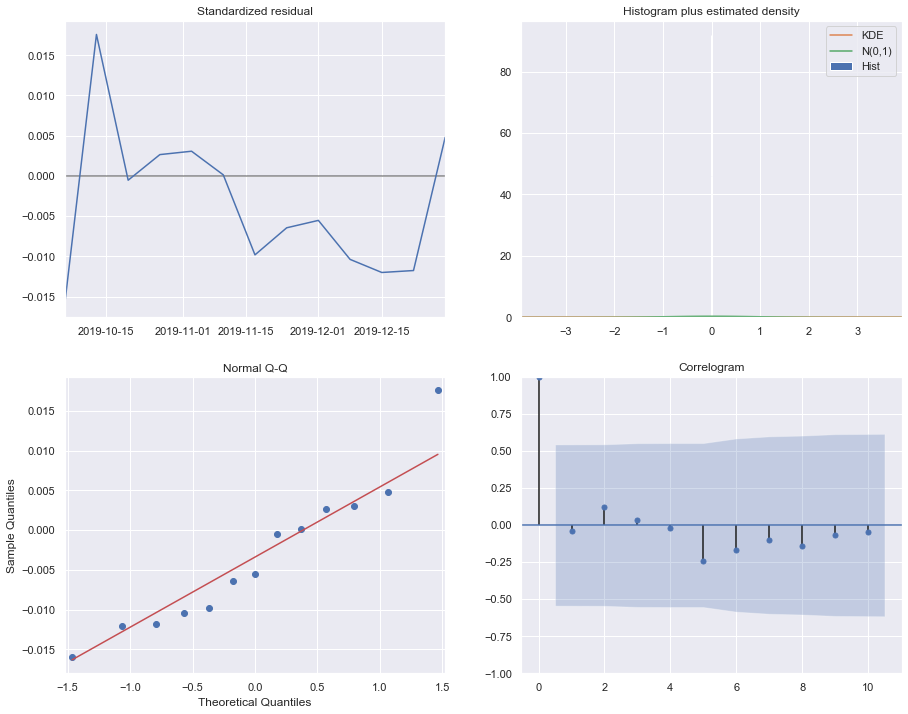

In [125]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

* Nuestra principal preocupación es asegurarnos de que los residuos de nuestro modelo no estén correlacionados y se distribuyan normalmente con una media cero. Si el modelo ARIMA estacional no satisface estas propiedades, es una buena indicación de que se puede mejorar aún más.
* En este caso, el diagnóstico de nuestro modelo sugiere que los residuos del modelo se distribuyen normalmente en función de lo siguiente:
* 1-  En la gráfica superior derecha se observa muy levemente que la KDE línea roja seguiria de cerca a la N(0,1)línea (donde N(0,1)) es la notación estándar para una distribución normal con media 0 y desviación estándar de 1).  Ésta es una buena indicación de que los residuos se distribuyen normalmente. Como estamos ante un RMSE = 34 el gráfico "casi" ni grafica los errores , dado que "casi" no los hay.

* 2-El gráfico qq en la parte inferior izquierda muestra que la distribución ordenada de los residuos (puntos azules) sigue la tendencia lineal de las muestras tomadas de una distribución normal estándar con N(0, 1). Nuevamente, esta es una fuerte indicación de que los residuos se distribuyen normalmente.

* 3-Los residuos a lo largo del tiempo (gráfico superior izquierdo) no muestran ninguna estacionalidad obvia y parecen ser ruido blanco. Esto es confirmado por la gráfica de autocorrelación (es decir, correlograma) en la parte inferior derecha, que muestra que los residuales de la serie de tiempo tienen baja correlación con versiones rezagadas de sí mismo.

****Hemos obtenido un modelo para nuestra serie de tiempo que ahora se puede utilizar para producir pronósticos. Comenzamos comparando los valores predichos con los valores reales de la serie de tiempo, lo que nos ayudará a comprender la precisión de nuestros pronósticos. Los atributos get_prediction()y conf_int()nos permiten obtener los valores e intervalos de confianza asociados para los pronósticos de la serie temporal.****

* El dynamic=False argumento asegura que producimos pronósticos con un paso de anticipación, lo que significa que los pronósticos en cada punto se generan utilizando el historial completo hasta ese punto.

* _*El ultimo trimestre de 2019 es considerado a partir del **6 de Octubre hasta el 29 de Diciembre**.*_

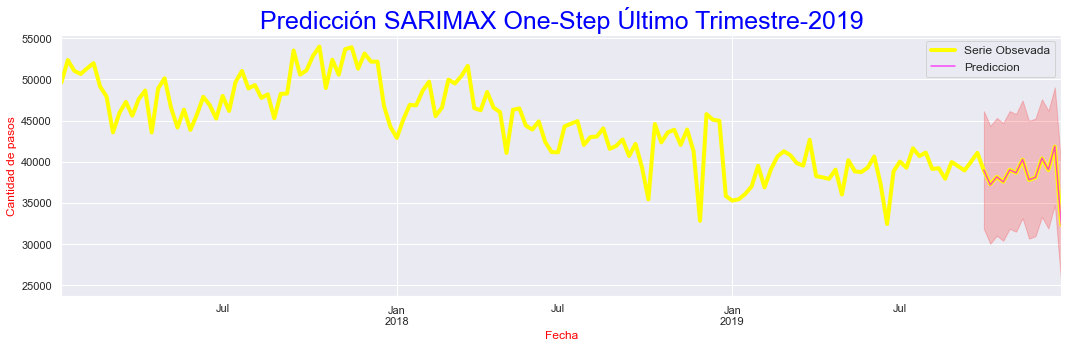

In [138]:

pred = results.get_prediction(start=datetime.datetime(2019,10,6), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='Serie Obsevada',color='yellow',lw = 4,figsize=(15,5))

pred.predicted_mean.plot(ax=ax, label='Prediccion', alpha=.7, color='magenta')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.2)
plt.title("Predicción SARIMAX One-Step Último Trimestre-2019", color= 'blue', fontsize=25)
ax.set_xlabel('Fecha',color='red')
ax.set_ylabel('Cantidad de pasos',color='red')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

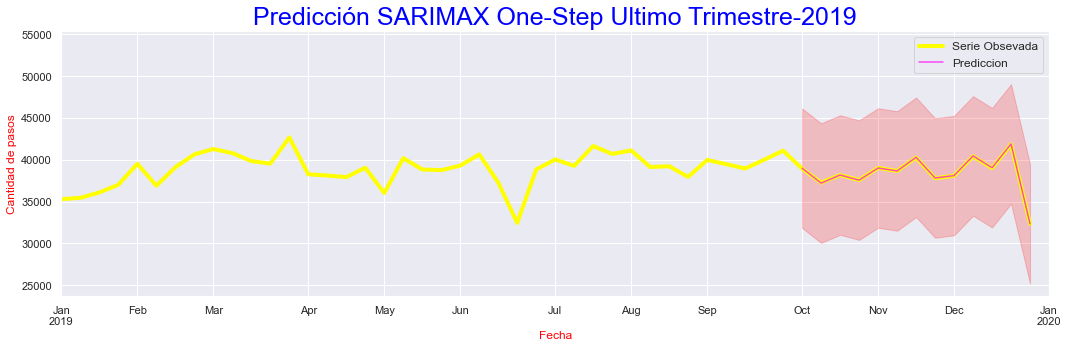

In [139]:
#Graficando solo el año 2019
pred = results.get_prediction(start=datetime.datetime(2019,10,6), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='Serie Obsevada',color='yellow',lw = 4,figsize=(15,5))

pred.predicted_mean.plot(ax=ax, label='Prediccion', alpha=.7, color='magenta')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=0.2)
plt.title("Predicción SARIMAX One-Step Ultimo Trimestre-2019", color= 'blue', fontsize=25)
ax.set_xlabel('Fecha',color='red')
ax.set_ylabel('Cantidad de pasos',color='red')
plt.xlim(datetime.datetime(2019,1,1), datetime.datetime(2019,12,31))
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

*-*  En general, nuestros pronósticos se alinean muy bien con los valores reales*

In [140]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-10-06':]


rmse_so = np.sqrt(mean_squared_error(y_truth,y_forecasted ))
print(f'RMSE de SARIMAX One-Step es: {rmse_so }')

RMSE de SARIMAX One-Step es: 34.97076648348804


* Sin embargo, se puede obtener una mejor representación de nuestro verdadero poder predictivo utilizando pronósticos dinámicos. En este caso, solo usamos información de la serie de tiempo hasta cierto punto, y después de eso, los pronósticos se generan usando valores de puntos de tiempo previos previos. (dynamic=True)

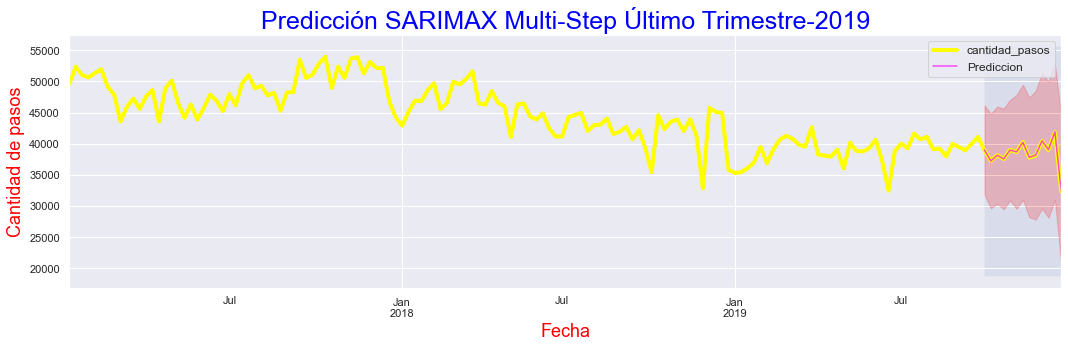

In [141]:

pred_dynamic = results.get_prediction(start=datetime.datetime(2019,10,6), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = y['2017':].plot(color='yellow',lw = 4, figsize=(15, 5))

pred_dynamic.predicted_mean.plot(ax=ax, label='Prediccion', alpha=.7, figsize=(15, 5), color='magenta')
plt.legend()
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='red', alpha=.2)

ax.fill_betweenx(ax.get_ylim(), datetime.datetime(2019,10,6), y.index[-1],
                 alpha=.1, zorder=-1)
plt.title("Predicción SARIMAX Multi-Step Último Trimestre-2019", color= 'blue', fontsize=25)
ax.set_xlabel('Fecha',color='red',fontsize=18 )
ax.set_ylabel('Cantidad de pasos',color='red', fontsize=18)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

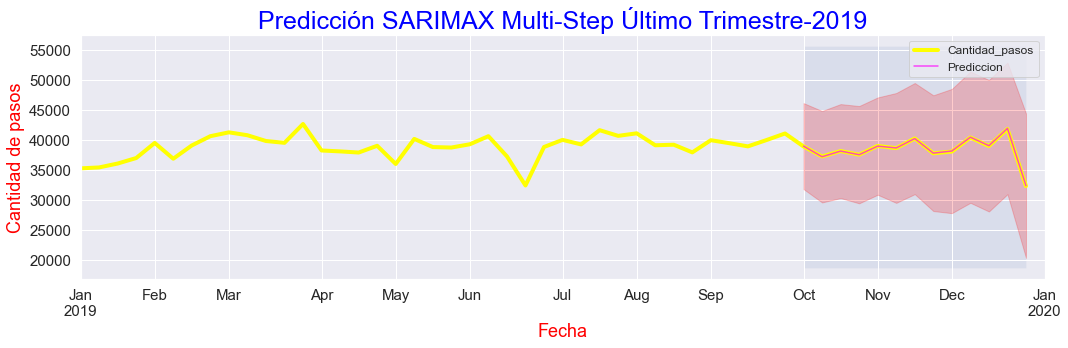

In [142]:
#Graficando solo el año 2019
pred_dynamic = results.get_prediction(start=datetime.datetime(2019,10,6), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = y['2017':].plot(label='Cantidad_pasos',color='yellow',lw = 4,figsize=(15, 5) )

pred_dynamic.predicted_mean.plot(ax=ax, label='Prediccion', alpha=.7, figsize=(15, 5), color='magenta')
plt.legend()
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='red', alpha=.2)

ax.fill_betweenx(ax.get_ylim(), datetime.datetime(2019,10,6), y.index[-1],
                 alpha=.1, zorder=-1)
plt.title("Predicción SARIMAX Multi-Step Último Trimestre-2019", color= 'blue', fontsize=25)
ax.set_xlabel('Fecha',color='red',fontsize=18 )
ax.set_ylabel('Cantidad de pasos',color='red', fontsize=18)
plt.xlim(datetime.datetime(2019,1,1), datetime.datetime(2019,12,31))
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [143]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2019-10-06':]


rmse_sm = np.sqrt(mean_squared_error(y_truth,y_forecasted ))
print(f'RMSE de SARIMAX Multi-Step es: {rmse_sm}')

RMSE de SARIMAX Multi-Step es: 50.74222808442874


* Los valores predichos obtenidos de los pronósticos dinámicos arrojan un RMSE = 50.74222808442874 . Esto es un poco más alto que el de un paso adelante ( One-Step), lo cual es de esperar dado que confiamos en menos datos históricos de la serie de tiempo.

****Tanto los pronósticos de un paso adelante como los dinámicos confirman que este modelo de series de tiempo es válido. Sin embargo, gran parte del interés en el pronóstico de series de tiempo es la capacidad de pronosticar valores futuros con mucha anticipación en el tiempo.****

#### Comparación de resultados y Conclusiòn

In [144]:
result_d= {'Modelo':['Bchm','RFR','XGBR','SARIMAX-OS','SARIMAX-MS'],
           'Error':[b_rmse,rmse_rf,rmse_xgb,rmse_so,rmse_sm]}
tabla=pd.DataFrame(result_d,)
tabla

Modelo        Error
0        Bchm  2999.828723
1         RFR  1448.605375
2        XGBR  1639.416229
3  SARIMAX-OS    34.970766
4  SARIMAX-MS    50.742228

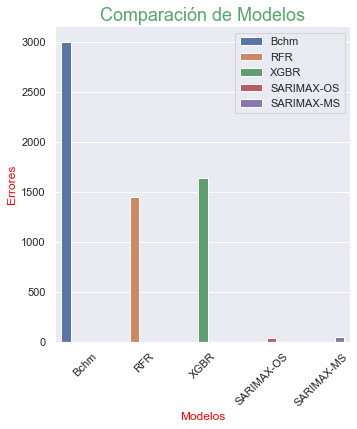

In [145]:

sns.catplot(x='Modelo', y='Error' , hue='Modelo',kind='bar', data=tabla, legend=False)
plt.xlabel('Modelos', color='red')
plt.xticks (rotation =45)
plt.title('Comparación de Modelos', color='g',size=18)
plt.ylabel('Errores', color='red')

plt.ylim(ymin=0)
plt.legend(loc='best')
plt.show()

 **Observamos que todos los modelos predicen mejor que el Modelo Benchmark**. 

**La prediccion con SARIMAX tanto One-Step, como Multi-Step es muy buena, los RSME que arroja son excelentes. Por lo tanto SARIMAX One-Step sera el modelo elegido para predecir el 2020**

### Año 2020

##### Producir y visualizar pronósticos
* Aprovechar nuestro modelo de serie temporal ARIMA estacional para pronosticar valores futuros. El get_forecast()atributo de nuestro objeto de serie temporal puede calcular valores pronosticados para un número específico de pasos adelante. Podemos usar la salida de este código para trazar la serie de tiempo y los pronósticos de sus valores futuros.

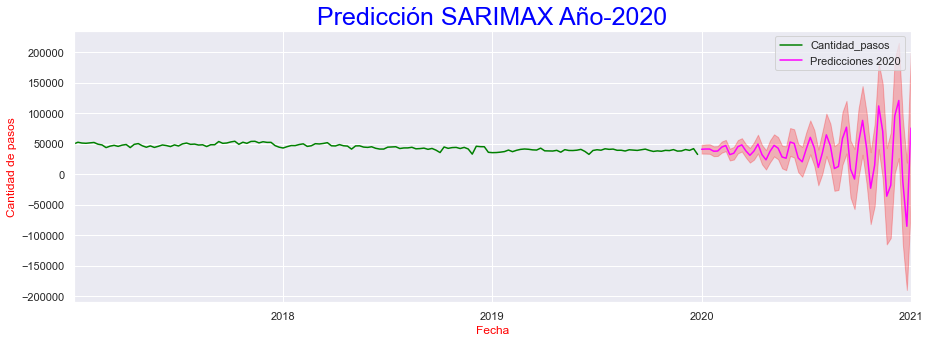

In [146]:
#graficando desde el 2017
pred_uc = results.get_forecast(steps=datetime.datetime(2020,12,31))
pred_ci = pred_uc.conf_int()

ax = y.plot(label='Cantidad_pasos', color='green',figsize=(15,5))
pred_uc.predicted_mean.plot(ax=ax, label='Predicciones 2020', color='magenta')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.25)
plt.title("Predicción SARIMAX Año-2020", color= 'blue', fontsize=25)
ax.set_xlabel('Fecha', color='red')
ax.set_ylabel('Cantidad de pasos', color='red')

plt.legend()
plt.show()

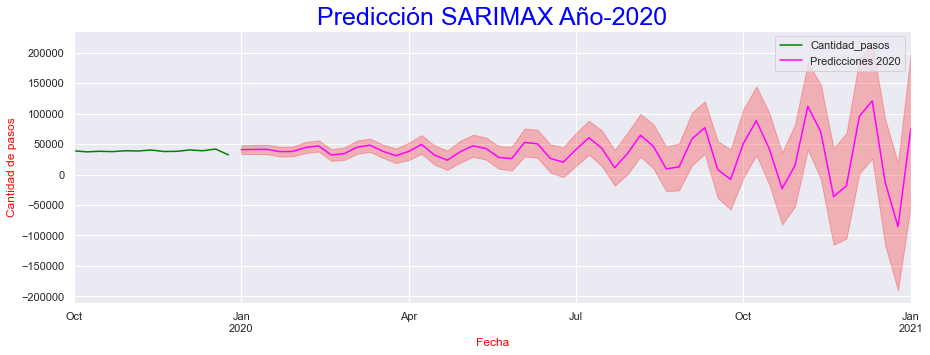

In [147]:
#Graficando desde el último trimestre del 2019
pred_uc = results.get_forecast(steps=datetime.datetime(2020,12,31))
pred_ci = pred_uc.conf_int()

ax = y.plot(label='Cantidad_pasos', color='green',figsize=(15,5))
pred_uc.predicted_mean.plot(ax=ax, label='Predicciones 2020', color='magenta')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.25)
plt.title("Predicción SARIMAX Año-2020", color= 'blue', fontsize=25)
plt.xlim(datetime.datetime(2019,10,6), datetime.datetime(2020,12,31))
ax.set_xlabel('Fecha', color='red')
ax.set_ylabel('Cantidad de pasos', color='red')

plt.legend()
plt.show()

****A medida que pronosticamos más en el futuro, es natural que tengamos menos confianza en nuestros valores. Esto se refleja en los intervalos de confianza generados por nuestro modelo, que se hacen más grandes a medida que nos adentramos en el futuro.***

## Conclusiones Finales

* _*Este Proyecto fue muy desafiante, requeririó de una búsqueda exhaustiva de documentaciòn extra, ya que contábamos perfectamente con las herramientas, pero no teníamos muy claro cómo implementarlas. Esto También nos ayudó, y considero que es lo que realiza un DS, a perder el medio a buscar y probar, tantas veces hasta obtener el resultado deseado.*_

* _*Los resultados obtenidos son muy buenos, pero hay que tener en cuenta que a veces se pueden mejorar.*_

* _*En cuanto a lo que me gustaria implementar, en el Proyecto 4,  sería Prophet o LSTM, y ver si mejoran las predicciones.*_

* _*Como sabemos las series de tiempo brindan la oportunidad de pronosticar valores futuros, basándose en valores anteriores. Las series de tiempo se pueden utilizar para pronosticar tendencias. Estamos asumiendo un supuesto muy importante: que el futuro se va a comportar como el pasado. Es importante saber  que estamos presuponiendo esto a la hora de trabajar con predicciones en series de tiempo. El futuro es incierto y podemos aproximarnos a lo que puede llegar a suceder, ¡pero siempre vamos a tener un componente de sorpresa! En este caso en particular los componentes sorpresas serian la Pandemis y con la Cuarentena implementada en en todo el pais, y sobre todo en el AMBA, y la obligatoiredad por parte del gobierno de la Ciudad a usar TELEPASE, lo que obviamente haria que los pagos en efectivo fueran casis nulos. Entonces seria interesante poder incorporar estas variables al moneto de predecir.*_

* _*El trabajo en equipo fue fudamental*_